<a href="https://colab.research.google.com/github/HanniaMele/bedu-equipo4-dataScience-M4/blob/main/FinalProject_M4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Final Fase 3 Módulo 4 BEDU

##Análisis de datos con Python - Equipo 4

###Integrantes: 
- Juan Manuel Ledesma Rangel
- Hannia Melendres Samaniego
- Alejandro Cortez Sánchez
- Martín Otamendi Torres


---
##A. [Previo] Procesamiento de datos

###A.1 Problema:

> **Aprobación de tarjetas de crédito**

###A.2 Justificación:

> Las tarjetas de crédito, o los créditos en general, son una herramienta muy útil en la gestión de nuestra economía que nos permite disponer de recursos previos a recibirlos, ya sea para gastos con fechas de vencimiento previas a nuestros sueldos, o bien como inversión en un negocio, obtención de un vehículo o la compra de alguna propiedad.

###A.3 Fundamento teórico del proyecto:
> Se puede encontrar en orden en el siguiente documento de Google: https://docs.google.com/document/d/1nbC2af8jHUDiPumL37MXzTYX_cTbfi-urIsh3yPr1fo/edit?usp=sharing

###A.4 Planteamiento de preguntas
Tras realizar la investigación preliminar, surgieron las siguientes preguntas (también encontradas dentro del documento comentado con anterioridad):

1.   _¿Cumplir con las recomendaciones anteriores (ingresos, historial y referencias) asegura obtener la aprobación de la tarjeta de crédito?_
2.   _¿Cuál es la industria con mayor densidad de acuerdo al ingreso?_
3.   _¿Existe correlación entre el género y la aprobación de la tarjeta de crédito?_
4.   _¿Existe correlación entre la edad y la aprobación de la tarjeta de crédito?_
5.   _¿Existe correlación entre los rasgos raciales y la aprobación de la tarjeta de crédito?_

### A.5 Colección de datos/AED/Limpieza

Para el análisis, utilizaremos los dataset (en formato .csv)...

>"credit_card_approvals_clean.csv"

obtenido desde https://www.kaggle.com/datasets/samuelcortinhas/credit-card-approval-clean-data?select=crx.csv, y encontrado en nuestro repositorio.

>**ACLARACIÓN**:
Este dataset fue _**previamente limpiado por terceros**_. Originalmente fue censurado para salvaguardar los datos de los clientes y del banco al que se otorgaron. Los datos censurados fueron reinterpretados por la comunidad de **rpubs** (https://rpubs.com/RyMcM385/450952), cuya propuesta es la base lógica con que se limpió el presente dataset. Cumplimos nuestra labor de verificar esa lógica, comprenderla y hacer sabio uso de ella. 

####A.4.1 Importación y AED

Realizamos un análisis exploratorio de datos para conocerlos.

In [99]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/HanniaMele/bedu-equipo4-dataScience-M4/main/raw_data/credit_card_approvals_clean.csv")

df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [100]:
df.tail()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0
689,1,35.00,3.375,1,1,Energy,Black,8.29,0,0,0,1,ByBirth,0,0,0


In [101]:
df.shape

(690, 16)

####A.4.2 Mapping e indexación de filas

In [102]:
df.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

Observamos las columnas y notamos que estás no tienen el formato `snake_case`, por lo que realizamos mapping.

In [103]:
df = df.rename({"Gender": "gender",
            "Age": "age",
            "Debt": "debt",
            "Married": "married",
            "BankCustomer": "bank_customer",
            "Industry": "industry",
            "Ethnicity": "ethnicity",
            "YearsEmployed": "years_employed",
            "PriorDefault": "prior_default",
            "Employed": "employed",
            "CreditScore": "credit_score",
            "DriversLicense": "driver_license",
            "Citizen": "citizen",
            "ZipCode": "zip_code",
            "Income": "income",
            "Approved": "approved"},
            axis = 1)

df.head()

,gender,age,debt,married,bank_customer,industry,ethnicity,years_employed,prior_default,employed,credit_score,driver_license,citizen,zip_code,income,approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


####A.4.3 NaNs

Buscamos nans con la función `.isna()`.

In [104]:
df.isna().sum(axis=0)

gender            0
age               0
debt              0
married           0
bank_customer     0
industry          0
ethnicity         0
years_employed    0
prior_default     0
employed          0
credit_score      0
driver_license    0
citizen           0
zip_code          0
income            0
approved          0
dtype: int64

Nuestros datos están **limpios**.

####A.4.4 Tipos de datos

Verificamos tipos de datos con `.dtypes`.

In [105]:
df.dtypes

gender              int64
age               float64
debt              float64
married             int64
bank_customer       int64
industry           object
ethnicity          object
years_employed    float64
prior_default       int64
employed            int64
credit_score        int64
driver_license      int64
citizen            object
zip_code            int64
income              int64
approved            int64
dtype: object

Nuestros datos están correctamente tipeados y **listos para usarse**.

---
##B. Estimados de locación y variabilidad - Postwork 1

###B.0 Instrucciones

La actividad consiste en lo siguiente:

- Identifica las columnas de tu dataset que tengan datos numéricos.
- Identifica la relevancia de esas columnas (qué tan importantes son para responder a tus preguntas).
- Obtén los siguientes estimados de tus columnas numéricas:
 - Promedio
 - Mediana
 - Media Truncada
 - Desviación estándar
 - Rango
 - Percentiles 25 y 75 (por lo menos)
 - Rango intercuartil

###B.1 Datos estructurados
Visualizamos `.head()` de nuestro dataset nuevamente...

In [106]:
df.head()

,gender,age,debt,married,bank_customer,industry,ethnicity,years_employed,prior_default,employed,credit_score,driver_license,citizen,zip_code,income,approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


y notamos que contamos tanto con `variables cualitativas` como `variables cuantitativas`.

####B.1.1 Datos cualitativos no binarios

Tras analizar e investigar la fuente de nuestro dataset, determinamos que hay dos tipos de datos categóricos (no binarios)...

- Aquellos con valores de cadena (string):

In [107]:
df[["industry", "ethnicity", "citizen"]].dtypes

industry     object
ethnicity    object
citizen      object
dtype: object

- Aquellos con valores numéricos:

In [108]:
df[["credit_score", "zip_code"]].dtypes

credit_score    int64
zip_code        int64
dtype: object

Para el caso de `zip_code`, sus valores determinan cierta zona geográfica. En cambio, para `credit_score`, sus valores indican el puntaje crediticio obtenido según reportes anteriores a la solicitud de tarjeta de crédito de este dataset. 

Los bancos (y otras empresas como aquellas de tiendas departamentales) cuentan con su rango de puntaje crediticio que van otorgando a sus clientes según corresponda. Por ende, este último ya tiene un rango establecido desde mucho antes, convirtiéndolo en una variable categórica a pesar de contar con valores numéricos.

Sus valores para este dataset son:

In [109]:
np.unique(df["credit_score"])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 19, 20, 23, 40, 67])

####B.1.2 Datos cualitativos binarios

Solo por la visualización del `.head()`, podemos suponer cuáles de nuestras columnas contienen datos binarios. Sin embargo, lo comprobaremos con la función `np.unique()`.

In [110]:
#Columna gender
print(f"Para 'gender':")
print(np.unique(df["gender"]))
print("\n")

#Columna married
print(f"Para 'married':")
print(np.unique(df["married"]))
print("\n")

#Columna bank_customer
print(f"Para 'bank_customer':")
print(np.unique(df["bank_customer"]))
print("\n")

#Columna prior_default
print(f"Para 'prior_default':")
print(np.unique(df["prior_default"]))
print("\n")

#Columna employed
print(f"Para 'employed':")
print(np.unique(df["employed"]))
print("\n")

#Columna driver_license
print(f"Para 'driver_license':")
print(np.unique(df["driver_license"]))
print("\n")

#Columna approved
print(f"Para 'approved':")
print(np.unique(df["approved"]))
print("\n")

Para 'gender':
[0 1]


Para 'married':
[0 1]


Para 'bank_customer':
[0 1]


Para 'prior_default':
[0 1]


Para 'employed':
[0 1]


Para 'driver_license':
[0 1]


Para 'approved':
[0 1]




Y efectivamente, todas las columnas que sospechábamos de tipo binario, resultaron serlo.

####B.1.3 Datos cuantitativos

Nuestros datos cuantitativos son:

In [111]:
df[["age", "debt", "years_employed", "income"]].dtypes

age               float64
debt              float64
years_employed    float64
income              int64
dtype: object

###B.2 Estimados de locación
Con nuestros datos estructurados ya distinguidos, podemos proceder a conocerlos por medio de estadísticos y visualizaciones.

####B.2.1 Datos cuantitativos
La mayoría de estimados de locación o medidas de tendencia central se pueden realizar para datos cuantitativos. Así:

#####B.2.1.1 Media
Aplicamos `.mean()` a nuestros datos cuantitativos, para obtener el promedio.

In [112]:
#Columna age
print(f"Para columna 'age', la media es de {round(df['age'].mean(), 2)}")
print("\n")

#Columna debt
print(f"Para columna 'debt', la media es de {round(df['debt'].mean(), 2)}")
print("\n")

#Columna years_employed
print(f"Para columna 'years_employed', la media es de {round(df['years_employed'].mean(),2)}")
print("\n")

#Columna age
print(f"Para columna 'income', la media es de {round(df['income'].mean(),2)}")
print("\n")

Para columna 'age', la media es de 31.51


Para columna 'debt', la media es de 4.76


Para columna 'years_employed', la media es de 2.22


Para columna 'income', la media es de 1017.39




#####B.2.1.2 Mediana
Aplicamos `.median()` a nuestros datos cuantitativos, para conocer el valor posicionado al centro.

In [113]:
#Columna age
print(f"Para columna 'age', la mediana es de {round(df['age'].median(), 2)}")
print("\n")

#Columna debt
print(f"Para columna 'debt', la mediana es de {round(df['debt'].median(), 2)}")
print("\n")

#Columna years_employed
print(f"Para columna 'years_employed', la mediana es de {round(df['years_employed'].median(),2)}")
print("\n")

#Columna age
print(f"Para columna 'income', la mediana es de {round(df['income'].median(),2)}")
print("\n")

Para columna 'age', la mediana es de 28.46


Para columna 'debt', la mediana es de 2.75


Para columna 'years_employed', la mediana es de 1.0


Para columna 'income', la mediana es de 5.0




Aunque sencillos, estos dos datos ya nos están otorgando información interesante sobre nuestro dataset. Por ejemplo, para las columnas de `age`, `debt` y `years_employed`, entre la mediana y la media no parece haber una distinción tan severa, al menos no a primera vista. No obstante, la diferencia para la columna `income` es abismal, y puede indicarnos la existencia de **datos atípicos**.

#####B.2.1.3 Media truncada
La media truncada no es una medida de tendencia central obligatoria, pero dado que tenemos esa diferencias abismal entre la media y la mediana de la columna `income`, nos puede ser de ayuda para comparar y asegurar la existencia de esos **datos atípicos** sin recurrir (aún) a las gráficas. Para ello usaremos la librería `scipy`, y truncaremos la media al **10%**.

In [114]:
from scipy import stats

mt = stats.trim_mean(df['income'], 0.1)
mt

206.66485507246378

Ahora la compararemos a la media y mediana que habíamos obtenido con anterioridad.

In [115]:
mt_mean = abs(df['income'].mean() - mt)
mt_median = abs(df['income'].median() - mt)

print("Distancia entre promedio y media truncada: " + str(mt_mean))
print("Distancia entre mediana y media truncada: "   + str(mt_median))

if (mt_mean > mt_median):
    print("La mediana es más cercana a la media truncada")
else:
    print("El promedio es más cercano a la media truncada")

Distancia entre promedio y media truncada: 810.7206521739131
Distancia entre mediana y media truncada: 201.66485507246378
La mediana es más cercana a la media truncada


Dado que la finalidad de la media truncada es eliminar datos atípicos que entorpezcan la obtención de un promedio representativo de los datos, el hecho de que sea la mediana (y no el promedio) el más cercano, simboliza que **efectivamente existen datos atípicos** para el array de `income`.

#####B.2.1.4 Desviación estándar
La desviación estándar nos permitirá identificar qué tan dispersos están nuestros datos. Para ello usamos la función `.std()`.

In [116]:
#Columna age
print(f"Para columna 'age', la desviación estándar es de {round(df['age'].std(), 2)}")
print("\n")

#Columna debt
print(f"Para columna 'debt', la desviación estándar es de {round(df['debt'].std(), 2)}")
print("\n")

#Columna years_employed
print(f"Para columna 'years_employed', la desviación estándar es de {round(df['years_employed'].std(),2)}")
print("\n")

#Columna age
print(f"Para columna 'income', la desviación estándar es de {round(df['income'].std(),2)}")

Para columna 'age', la desviación estándar es de 11.86


Para columna 'debt', la desviación estándar es de 4.98


Para columna 'years_employed', la desviación estándar es de 3.35


Para columna 'income', la desviación estándar es de 5210.1


Con este nuevo dato, reafirmamos nuevamente que la columna de `income` es un caso interesante.

#####B.2.1.5 Rango
El rango se obtiene de la diferencia de los minimos y máximos del conjunto de datos.

In [117]:
#Para age
print(f"El rango de la columna age es: {df['age'].max() - df['age'].min()}")
print("\n")

#Para debt
print(f"El rango de la columna debt es: {df['debt'].max() - df['debt'].min()}")
print("\n")

#Para years_employed
print(f"El rango de la columna years_employed es: {df['years_employed'].max() - df['years_employed'].min()}")
print("\n")

#Para income
print(f"El rango de la columna income es: {df['income'].max() - df['income'].min()}")

El rango de la columna age es: 66.5


El rango de la columna debt es: 28.0


El rango de la columna years_employed es: 28.5


El rango de la columna income es: 100000


#####B.2.1.6 Percentiles
Usando los percentiles, conoceremos las dimensiones de los valores de nuestros datos en lugares muy puntuales de la distribución, y completaremos nuestra imagen mental de la misma que hemos ido recopilando hasta ahora. Dado que `income` ha dado mucho de que hablar, la analizaremos en mayor profundidad. Usamos las funciones `.quantile()`, `.median()`, `.max()` y `.min()`.

In [118]:
#Para age
print("Para age...")
print(f"Percentil 25: {df['age'].quantile(0.25)}")
print(f'Percentil 75: {df["age"].quantile(0.75)}')
print("\n")

#Para debt
print("Para debt...")
print(f"Percentil 25: {df['debt'].quantile(0.25)}")
print(f'Percentil 75: {df["debt"].quantile(0.75)}')
print("\n")

#Para years_employed
print("Para years_employed...")
print(f"Percentil 25: {df['years_employed'].quantile(0.25)}")
print(f'Percentil 75: {df["years_employed"].quantile(0.75)}')
print("\n")

Para age...
Percentil 25: 22.67
Percentil 75: 37.707499999999996


Para debt...
Percentil 25: 1.0
Percentil 75: 7.2075


Para years_employed...
Percentil 25: 0.165
Percentil 75: 2.625




In [119]:
#Para income
print(f'Valor mínimo: {df["income"].min()}')
print(f"Percentil 5: {df['income'].quantile(0.05)}")
print(f'Percentil 10: {df["income"].quantile(0.1)}')
print(f"Percentil 15: {df['income'].quantile(0.15)}")
print(f"Percentil 20: {df['income'].quantile(0.20)}")
print(f'Percentil 25: {df["income"].quantile(0.25)}')
print(f"Percentil 35: {df['income'].quantile(0.35)}")
print(f'Mediana: {df["income"].median()}')
print(f"Percentil 60: {df['income'].quantile(0.6)}")
print(f"Percentil 65: {df['income'].quantile(0.65)}")
print(f'Percentil 75: {df["income"].quantile(0.75)}')
print(f"Percentil 85: {df['income'].quantile(0.85)}")
print(f'Percentil 90: {df["income"].quantile(0.9)}')
print(f'Valor máximo: {df["income"].max()}')

Valor mínimo: 0
Percentil 5: 0.0
Percentil 10: 0.0
Percentil 15: 0.0
Percentil 20: 0.0
Percentil 25: 0.0
Percentil 35: 0.0
Mediana: 5.0
Percentil 60: 50.0
Percentil 65: 125.40000000000009
Percentil 75: 395.5
Percentil 85: 1000.0
Percentil 90: 2000.0
Valor máximo: 100000


Vemos que del percentil 0 hasta el percentil 35 se tienen puros 0, lo cual hace comprender porqué nuestro promedio y mediana están tan alejados el uno del otro. Pasado el percentil 50, los datos se elevan cada vez más excesivamente hasta alcanzar el valor máximo de 100000, y confirmando con ello la presencia de valores típicos demasiado grandes.

#####B.2.1.6 Rango intercuartilíco (RIC o IQR)
Rango de los datos más cercanos a los datos típicos. Lo obtenemos por la diferencia entre el cuartil 25 y 75.

In [120]:
#Para age
print(f'El IQR para age es: {df["age"].quantile(0.75) - df["age"].quantile(0.25)}')
print("\n")

#Para debt
print(f'El IQR para debt es: {df["debt"].quantile(0.75) - df["debt"].quantile(0.25)}')
print("\n")

#Para years_employed
print(f'El IQR para years_employed es: {df["years_employed"].quantile(0.75) - df["years_employed"].quantile(0.25)}')
print("\n")

#Para income
print(f'El IQR para income es: {df["income"].quantile(0.75) - df["income"].quantile(0.25)}')

El IQR para age es: 15.037499999999994


El IQR para debt es: 6.2075


El IQR para years_employed es: 2.46


El IQR para income es: 395.5


####B.2.2 Datos cualitativos
Se utiliza la moda, `statistics.mode()`, para conocer el valor que más se repite de un conjunto de datos categóricos. Así:

#####B.2.2.1 No binarios

In [121]:
import statistics
print("De valor cadena:")

#Columna industry
print(f"Para columna 'industry', la moda es {statistics.mode(df['industry'])}")
print("\n")

#Columna ethnicity
print(f"Para columna 'ethnicity', la moda es {statistics.mode(df['ethnicity'])}")
print("\n")

#Columna citizen
print(f"Para columna 'citizen', la moda es {statistics.mode(df['citizen'])}")
print("\n")

#---------

print("De valor numérico:")

#Columna credit_score
print(f"Para columna 'credit_score', la moda es de {statistics.mode(df['credit_score'])}")
print("\n")

#Columna zip_code
print(f"Para columna 'zip_code', la moda es de {statistics.mode(df['zip_code'])}")
print("\n")

De valor cadena:
Para columna 'industry', la moda es Energy


Para columna 'ethnicity', la moda es White


Para columna 'citizen', la moda es ByBirth


De valor numérico:
Para columna 'credit_score', la moda es de 0


Para columna 'zip_code', la moda es de 0




#####B.2.2.2 Binarios

In [122]:
#Columna gender
print(f"Para columna 'gender', la moda es {statistics.mode(df['gender'])}")
print("\n")

#Columna married
print(f"Para columna 'married', la moda es {statistics.mode(df['married'])}")
print("\n")

#Columna bank_customer
print(f"Para columna 'bank_customer', la moda es {statistics.mode(df['bank_customer'])}")
print("\n")

#Columna prior_default
print(f"Para columna 'prior_default', la moda es de {statistics.mode(df['prior_default'])}")
print("\n")

#Columna employed
print(f"Para columna 'employed', la moda es de {statistics.mode(df['employed'])}")
print("\n")

#Columna driver_license
print(f"Para columna 'driver_license', la moda es de {statistics.mode(df['driver_license'])}")
print("\n")

#Columna approved
print(f"Para columna 'approved', la moda es de {statistics.mode(df['approved'])}")
print("\n")

Para columna 'gender', la moda es 1


Para columna 'married', la moda es 1


Para columna 'bank_customer', la moda es 1


Para columna 'prior_default', la moda es de 1


Para columna 'employed', la moda es de 0


Para columna 'driver_license', la moda es de 0


Para columna 'approved', la moda es de 0




---
## C. Introducción a visualización de datos: Visualizaciones  - Postwork 2


###C.0 Instrucciones

* Utiliza boxplots para analizar la distribución de tus variables numéricas. Piensa acerca de cuáles son los valores típicos y atípicos y dónde están concentrados el grueso de tus datos.
* Utiliza el Score de Rango Intercuartílico para filtrar tus valores atípicos. Compara tus medianas, medias y desviaciones estándares antes y después de realizar la filtración y ve cuánto cambiaron.
* Utiliza tablas de frecuencia e histogramas para observar la distribución de tus variables. Caracteriza cada una de las distribuciones usando los términos que aprendiste durante la sesión. Obtén medidas de asimetría y curtosis para ver qué tan alejadas de la distribución normal están tus variables.
* Utiliza gráficas de densidad para comparar una variable numérica que pueda ser segmentada en dos o más categorías. Usa esta técnica para entender mejor cómo están distribuidos tus datos en cada uno de los grupos presentes.

###C.1 Boxplots

Llamamos las librerías `seaborn` y `matplotlib`, y reafirmamos los tipos de datos.

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
df

,gender,age,debt,married,bank_customer,industry,ethnicity,years_employed,prior_default,employed,credit_score,driver_license,citizen,zip_code,income,approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


In [125]:
df.dtypes

gender              int64
age               float64
debt              float64
married             int64
bank_customer       int64
industry           object
ethnicity          object
years_employed    float64
prior_default       int64
employed            int64
credit_score        int64
driver_license      int64
citizen            object
zip_code            int64
income              int64
approved            int64
dtype: object

Anteriormente, habíamos determinado que nuestro dataset contiene cuatro columnas con datos cuantitativos. Los boxplots utilizan datos numéricos para su graficación, por ende, por medio de la función personalizada `grafica_boxplots`, realizamos los cuatro al mismo tiempo con ayuda de la función `.subplots()`:

In [126]:
#Establecemos el estilo de la gráfica
sns.set_style("whitegrid") 

#Creamos una función que nos permitirá graficar todas mis boxplots 
def grafica_boxplots(df_numerico):
  tam = df_numerico.shape[1]

  fig, axis = plt.subplots(nrows=int(tam/2), ncols=int(tam/2), figsize=(16, 10), constrained_layout=True);

  ren = col = 0

  for (columnName, columnData) in df_numerico.iteritems():
    sns.boxplot(x=columnData.values, ax=axis[ren, col])
    axis[ren, col].set_title(f'Boxplot para {columnName}')
    axis[ren, col].set_xlabel(columnName.capitalize().replace('_', ' '))

    col += 1

    if(col == int(tam/2)):
      col = 0
      ren += 1

  fig.suptitle('Boxplots para variables numéricas', fontsize=18)

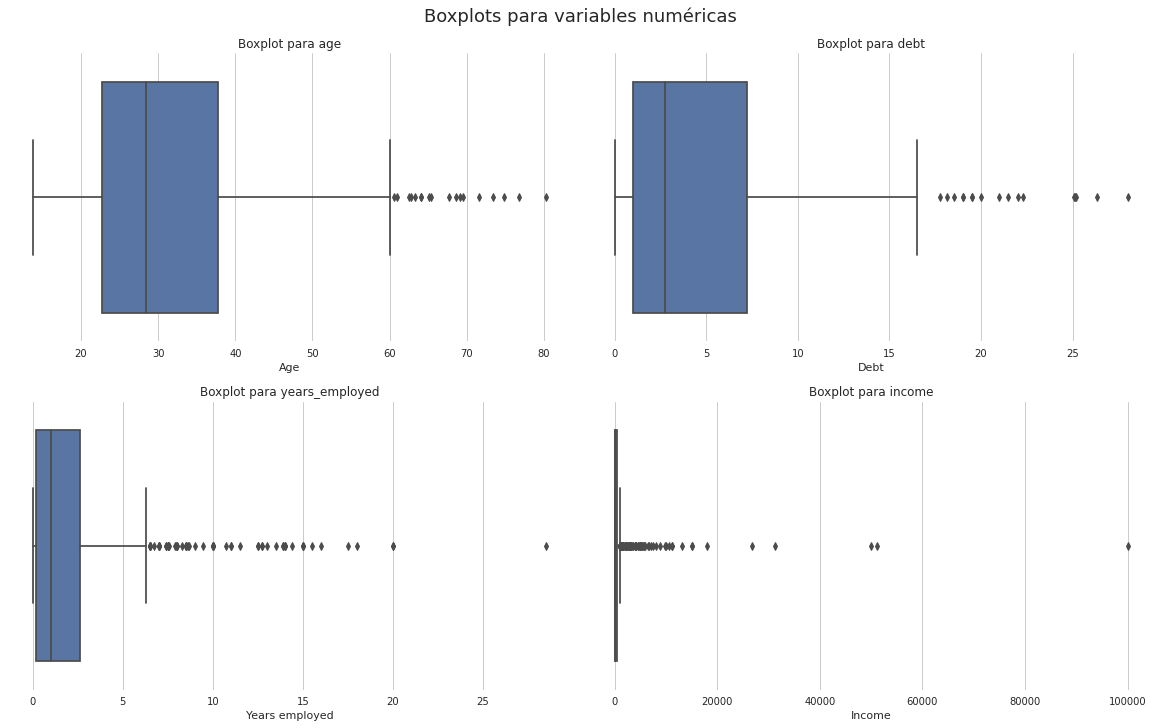

In [127]:
#Graficamos los boxplots
df_numerico = df[["age", "debt", "years_employed", "income"]]

grafica_boxplots(df_numerico)

Dadas las boxplots podemos notar que nuestros datos cuentan con un considerable número de datos atípicos, especialmente aquellos para la columna de `income`, pues justo como hemos dicho con anterioridad, esta presenta datos atípicos de gran tamaño.

In [128]:
#Observamos algunas estadísticas descriptivas de nuestros datos
describe_var_num = df_numerico.describe()
describe_var_num

,age,debt,years_employed,income
count,690.000000,690.000000,690.000000,690.000000
mean,31.514116,4.758725,2.223406,1017.385507
std,11.860245,4.978163,3.346513,5210.102598
min,13.750000,0.000000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.000000
50%,28.460000,2.750000,1.000000,5.000000
75%,37.707500,7.207500,2.625000,395.500000
max,80.250000,28.000000,28.500000,100000.000000


Filtramos los valores atípicos usando el score del rango intercuartílico descrito en la función `filtro_siqr`.

In [129]:
#Filtro de valores atípicos usando el score del rango intercuartílico

#Creamos una copia de mi dataframe original
df_copy = df.copy()

#Creamos una función para no repetir código
def filtro_siqr(serie_numerica):
  global df_copy

  iqr = serie_numerica.quantile(0.75) - serie_numerica.quantile(0.25)
  filtro_inferior = serie_numerica > serie_numerica.quantile(0.25) - (iqr * 1.5)
  filtro_superior = serie_numerica < serie_numerica.quantile(0.75) + (iqr * 1.5)

  df_copy = df_copy[filtro_inferior & filtro_superior]

In [130]:
#Filtramos 
df_numerico.apply(filtro_siqr, axis=0);

df_copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,gender,age,debt,married,bank_customer,industry,ethnicity,years_employed,prior_default,employed,credit_score,driver_license,citizen,zip_code,income,approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,1,40.58,3.290,1,1,CommunicationServices,White,3.50,0,0,0,1,ByOtherMeans,400,0,0
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0


Graficamos los boxplots nuevamente para verificar los cambios tras eliminar los datos atípicos.

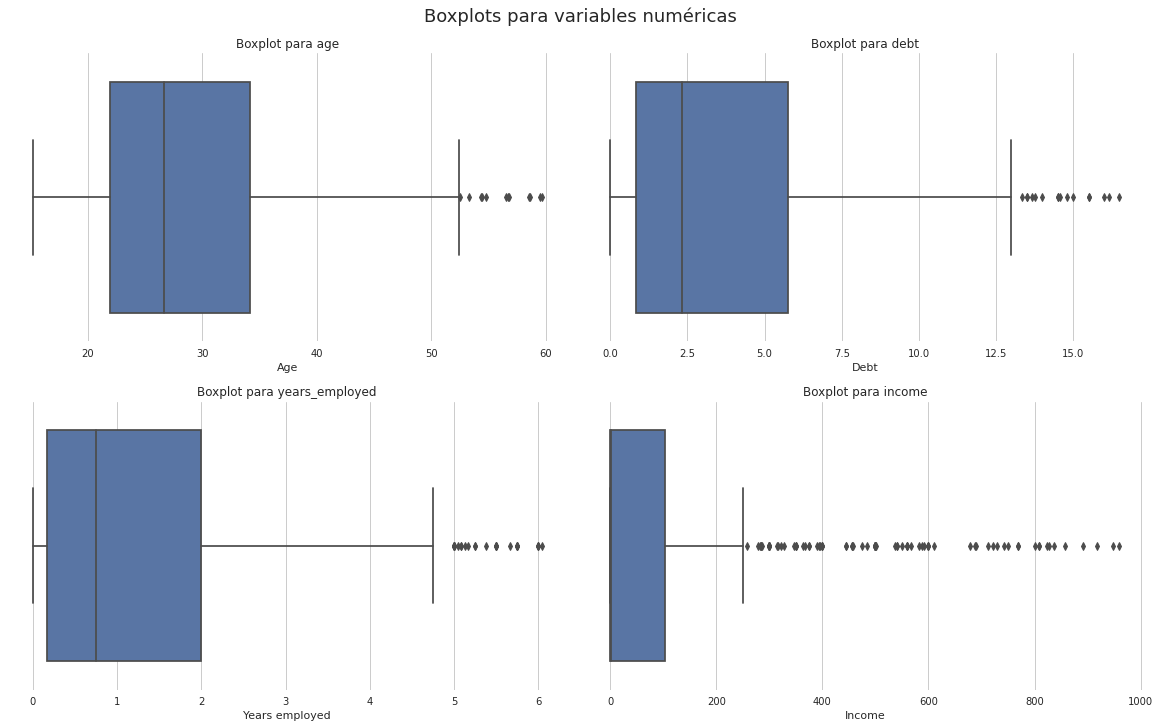

In [131]:
#Volvemos a graficar nuestras boxplots
grafica_boxplots(df_copy[list(df_numerico.columns)])

En comparación con los datos en crudo, estos datos filtrados están más aglomerados y es mucho más fácil apreciar sus detalles por medio de las gráficas. Evidentemente, tras la purga, se crean nuevos datos atípicos dada la naturaleza del descriptivo, pero estos se ajustan más a los medidas de tendencia central que sus antecesores.

In [132]:
#Observamos algunas estadísticas descriptivas de nuestros datos luego de haber sido filtrados
describe_var_num = df_copy[list(df_numerico.columns)].describe()
describe_var_num

,age,debt,years_employed,income
count,519.000000,519.000000,519.000000,519.000000
mean,28.931541,3.978950,1.315424,105.319846
std,9.415928,4.091696,1.501684,204.876387
min,15.170000,0.000000,0.000000,0.000000
25%,21.920000,0.832500,0.165000,0.000000
50%,26.670000,2.335000,0.750000,1.000000
75%,34.125000,5.772500,2.000000,102.500000
max,59.670000,16.500000,6.040000,960.000000


###C.2 Tablas de frecuencia

Para la creación de tablas de frecuencia, desarrollamos una función personalizada `obten_segmentos` dentro de la cual aplicamos la `regla de Sturge` con la finalidad de encontrar la cantidad necesaria de clases para nuestros datos.

In [133]:
arr_bins = pd.Series(dtype=int)

#Crear función para encontrar los segmentos de mis variables numéricas
def obten_segmentos(serie_numerica):
  global arr_bins
  
  #Regla de Sturge
  num_bins = int(1 + np.ceil(np.log2(len(serie_numerica))))
  arr_bins[serie_numerica.name] = num_bins

  print(serie_numerica.groupby(pd.cut(serie_numerica, num_bins)).count())
  print('\n')

Y la aplicamos.

In [134]:
#Generar tablas de frecuencias para las variables numericas 
df_copy[list(df_numerico.columns)].apply(obten_segmentos, axis=0);

age
(15.126, 19.215]     62
(19.215, 23.261]    119
(23.261, 27.306]     87
(27.306, 31.352]     78
(31.352, 35.397]     60
(35.397, 39.443]     36
(39.443, 43.488]     34
(43.488, 47.534]     15
(47.534, 51.579]     11
(51.579, 55.625]     10
(55.625, 59.67]       7
Name: age, dtype: int64


debt
(-0.0165, 1.5]    204
(1.5, 3.0]        103
(3.0, 4.5]         53
(4.5, 6.0]         35
(6.0, 7.5]         20
(7.5, 9.0]         13
(9.0, 10.5]        33
(10.5, 12.0]       27
(12.0, 13.5]       18
(13.5, 15.0]        8
(15.0, 16.5]        5
Name: debt, dtype: int64


years_employed
(-0.00604, 0.549]    245
(0.549, 1.098]        65
(1.098, 1.647]        52
(1.647, 2.196]        38
(2.196, 2.745]        34
(2.745, 3.295]        23
(3.295, 3.844]        16
(3.844, 4.393]        11
(4.393, 4.942]         8
(4.942, 5.491]        14
(5.491, 6.04]         13
Name: years_employed, dtype: int64


income
(-0.96, 87.273]       383
(87.273, 174.545]      30
(174.545, 261.818]     23
(261.818, 349.091]  

###C.3 Histogramas

Con las clases creadas, procedemos a aplicarlas en histogramas con la función `grafica_histogramas`.

In [135]:
#Creamos histogramas para cada una de mis variables
#Generamos una función para construir mis histogramas
def grafica_histogramas(df_numerico):
  tam = df_numerico.shape[1]

  fig, axis = plt.subplots(nrows=int(tam/2), ncols=int(tam/2), figsize=(12, 10), constrained_layout=True);
  
  ren = col = 0

  for (columnName, columnData) in df_numerico.iteritems():
    sns.histplot(x=columnData.values, kde=False, bins=arr_bins[columnName], ax=axis[ren, col]);
    axis[ren, col].set_title(f'Histograma para {columnName}')
    axis[ren, col].set_xlabel(columnName.capitalize().replace('_', ' '))

    col += 1

    if(col == int(tam/2)):
      col = 0
      ren += 1

  fig.suptitle('Histogramas para variables numéricas/cuantitativas', fontsize=18)

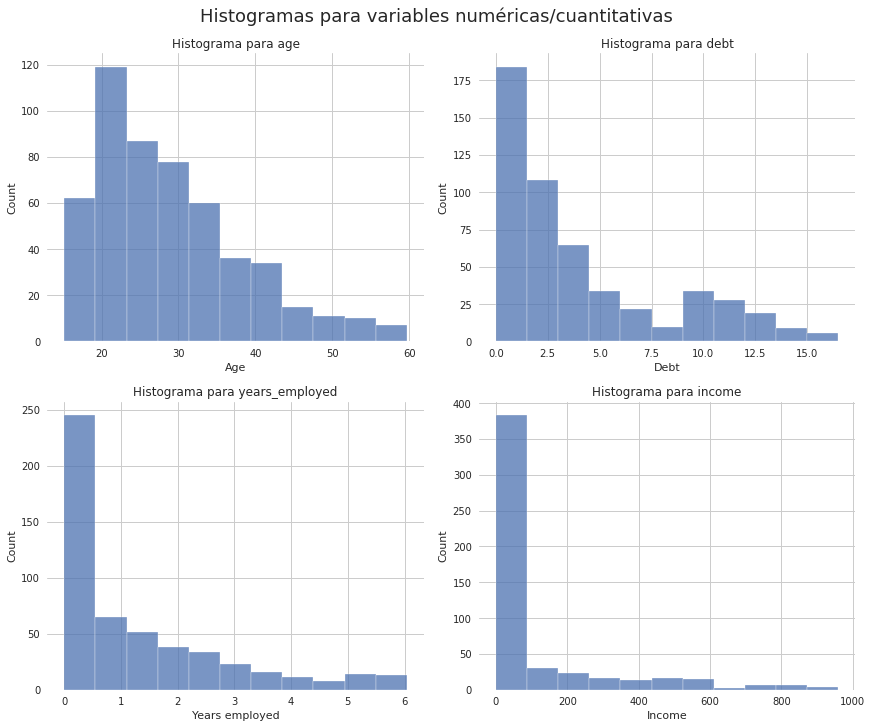

In [136]:
grafica_histogramas(df_copy[list(df_numerico.columns)])

Como primera impresión, podemos notar la tendencia que tienen los datos de las cuatro gráficas a los valores más bajos. Podemos notar el patrón donde la mayoría de personas son jóvenes, y-por ende-no han estado lo suficientemente activos económicamente hablando, para contar con altos años de laburo, ingresos o incluso deudas.

###C.4 Describiendo histogramas

Generamos una función que imprima la asimetría y curtosis de las cuatro columnas a la par, importando las funciones `skew()` y `kurtosis()` de la librería `scipy`.

In [137]:
#Obtener medidas de asimetría y curtosis
from scipy import stats
from scipy.stats import skew, kurtosis

#Generamos función para imprimir asimetría y curtosis de mis datos cuantitativos
def asm_cur(serie_numerica):
  print(f'Medidas para {serie_numerica.name}')
  print(f'Curtosis: {kurtosis(serie_numerica)}')
  print(f'Asimetría: {skew(serie_numerica)}\n')

In [138]:
df_copy[list(df_numerico.columns)].apply(asm_cur, axis=0);

Medidas para age
Curtosis: 0.4711144278586903
Asimetría: 0.9709682660972392

Medidas para debt
Curtosis: 0.17670306257774193
Asimetría: 1.1566770605062309

Medidas para years_employed
Curtosis: 1.0713420354790566
Asimetría: 1.3645151515580412

Medidas para income
Curtosis: 4.076360204419746
Asimetría: 2.1896738330259207



###C.5 Gráficas de densidad

Las gráficas de densidad pueden representarse de forma apilada o individual. Creamos dos funciones personalizadas, una para cada uno de estos fines:

- `grafica_densidad_completa` para densidad por categorías apiladas
- `grafica_densidad_individual` para la densidad por categoría individual

In [139]:
#Generamos gráficas de densidad utilizando categorías
#Creamos una función que nos permita graficar densidades por categoría apiladas
def grafica_densidad_completa(df_completo, columna, categoria):
  
  fig, axis = plt.subplots(figsize=(12, 10));
  sns.kdeplot(df_completo[columna], shade=True, hue=categoria, ax=axis);

  fig.suptitle(f'Gráfica de densidad para {columna} segmentado por {categoria.name}', fontsize=18)

In [140]:
#Creamos una función que nos permita graficar densidades por categoría separadas
def grafica_densidad_individual(df_completo, columna, categoria):
  g = sns.FacetGrid(df_completo, col=categoria.name, col_wrap=4, aspect=2);
  g.map(sns.kdeplot, columna);
  g.fig.subplots_adjust(top=0.8)
  g.fig.suptitle(f'Gráfica de densidad para {columna} segmentado por {categoria.name}', fontsize=18)

####C.5.1 Respondiendo a la pregunta 1



> _**¿Cumplir con las recomendaciones anteriores (ingresos, historial y referencias) asegura obtener la aprobación de la tarjeta de crédito?**_

En nuestro dataset contamos con datos de ingresos (income) y datos de historial de deudas (debt). Usaremos gráficas de densidad para representar esto con respecto a la categoría de aprobado (1) o no aprobado (0).



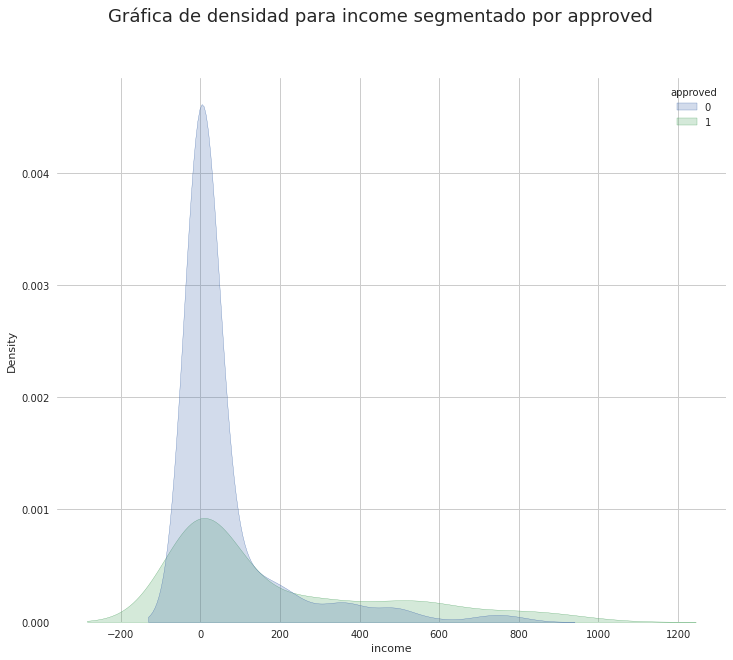

In [141]:
#Para ingresos
grafica_densidad_completa(df_copy, 'income', df_copy['approved'])

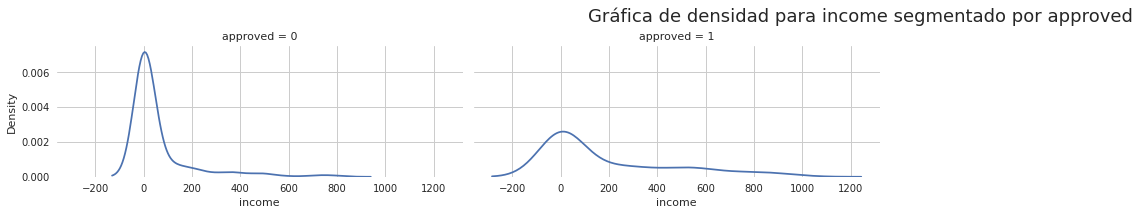

In [142]:
grafica_densidad_individual(df_copy, 'income', df_copy['approved'])

Para el ingreso, la gráfica de "no aprobado" (0) tiene más densidad de datos. Sin embargo, esta se encuentra centrada en el valor de 0, con una cola casi plana hacia loa valores grandes. Por otro lado, la gráfica de "aprobado" (1), sigue una tendencia similar, exertando el hecho de que los datos centrados en 0 son menores, y la cola extendida hacia los valores grandes presenta una densidad ligeramente mayor a la de "no aprobado". Por tanto:



> Sí, tener mayores ingresos hace más probable la aprobación de tu tarjeta de crédito.



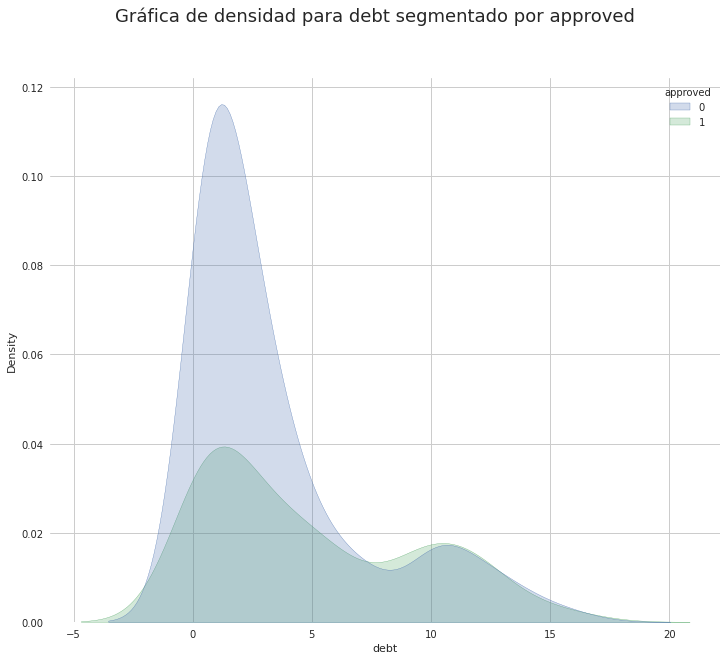

In [143]:
#Para debt
grafica_densidad_completa(df_copy, 'debt', df_copy['approved'])

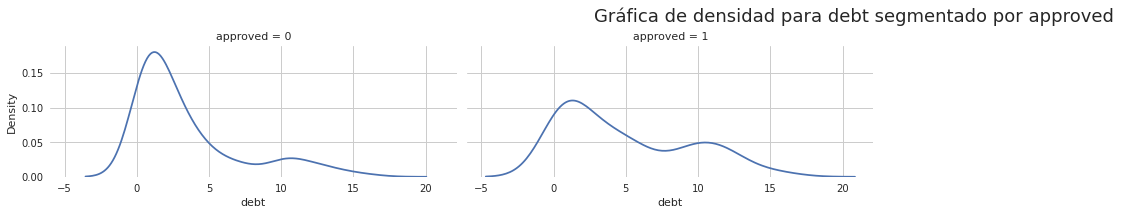

In [144]:
grafica_densidad_individual(df_copy, 'debt', df_copy['approved'])

En el caso del historial de deudas, para la gráfica de "no aprobado" observamos que por mínima que sea tu deuda, no es seguro que te den tu crédito. Esto probablemente se deba a que ser una persona sin deudas también puede significar estar iniciando tu vida económica y, por ende, no tener un historial como tal. Lo extraño está en cuánto a las personas con saldo a favor.

Para "aprobado" observamos que existen tanto sujetos con deudas como sin deudas (y otros con saldo a favor), pero el pico de los no adeudados es menor al de la gráfica de "no aprobado".

Suponemos entonces que:


> Sí, tener historial (con o sin deudas) te da más probabilidad de obtener un crédito, a comparación de quienes no tienen deudas por no tener historial.



---
##D. Exploración de variables categóricas y análisis multivariable - Postwork 3 [ESCOGER COLUMNAS]


###D.0 Instrucciones

En este Postwork vamos a explorar las distribuciones de las variables categóricas de nuestro dataset. 

* Si ya tienes gráficas realizadas en Postworks anteriores, agrega títulos, anotaciones y leyendas donde sea necesario. También cambia el tamaño de las gráficas donde tenga sentido hacerlo.
* Identifica todas las variables categóricas en tu dataset.
* Utiliza gráficas de barras para explorar la distribución de tus variables categóricas.
* Planea tu análisis multivariable: ¿qué combinaciones de variables categóricas podrían darme información útil acerca de la distribución de mis datos? ¿qué combinaciones de una variable numérica con una variable categórica podrían ser interesantes?
* Utiliza tablas de contingencia y múltiples gráficas en la misma figure para explorar combinaciones de variables categóricas.
* Utiliza boxplots y violinplots para explorar combinaciones de variables numéricas con variables categóricas.

###D.1 Anotando gráficas
Se realizó en conjunto al postwork anterior; no fue necesaria su implementación en el presente.

###D.2 Gráficas de barras

Entrando a territorio categórico, es necesario filtrar los datos de este tipo en un nuevo dataframe. Dado que no usaremos los valores de las columnas `credit_score` y `zip_code`, procedemos a retirarlos igualmente.

In [145]:
#Obtener variables categóricas de mi dataset
category_list = list(set(list(df_copy.columns)).difference(list(df_numerico.columns)))

df_categorico_filtrado = df_copy[category_list]

#Se remueve credit_score y zip_code también
category_list = list(set(list(df_categorico_filtrado.columns)).difference(['zip_code', 'credit_score']))
df_categorico_filtrado = df_categorico_filtrado[category_list]

df_categorico_filtrado

,married,prior_default,driver_license,gender,ethnicity,bank_customer,industry,employed,approved,citizen
0,1,1,0,1,White,1,Industrials,1,1,ByBirth
1,1,1,0,0,Black,1,Materials,1,1,ByBirth
2,1,1,0,0,Black,1,Materials,0,1,ByBirth
3,1,1,1,1,White,1,Industrials,1,1,ByBirth
4,1,1,0,1,White,1,Industrials,0,1,ByOtherMeans
...,...,...,...,...,...,...,...,...,...,...
684,1,0,1,1,White,1,CommunicationServices,0,0,ByOtherMeans
685,0,0,0,1,Black,0,Education,0,0,ByBirth
686,1,0,1,0,White,1,Energy,1,0,ByBirth
687,0,0,1,0,Latino,0,Healthcare,1,0,ByBirth


Reutilizando el código de `grafica_histogramas` y con pequeñas modificaciones, obtenemos las gráficas de barras de todos los datos categóricos:

In [146]:
#Crear gráficas de barras para conocer distribución de mis variables categóricas
#Generamos una función para construir mis gráficas de barras
def grafica_histogramas(df_categorico):
  tam = df_categorico.shape[1]

  r = 2
  c = 5

  fig, axis = plt.subplots(nrows=r, ncols=c, figsize=(24, 14), constrained_layout=True);
  
  ren = col = 0

  for (columnName, columnData) in df_categorico.iteritems():
    counts = columnData.value_counts()
    sns.barplot(x=counts.index, y=counts, ax=axis[ren, col]);
    axis[ren, col].set_title(f'Gráfica de barras para {columnName}')
    axis[ren, col].set_xlabel(columnName.capitalize().replace('_', ' '))
    if(len(counts.index) > 2):
      axis[ren, col].tick_params('x', labelrotation=90)

    col += 1

    if(col == c):
      col = 0
      ren += 1

  fig.suptitle('Gráficas de barras para variables categóricas', fontsize=18)

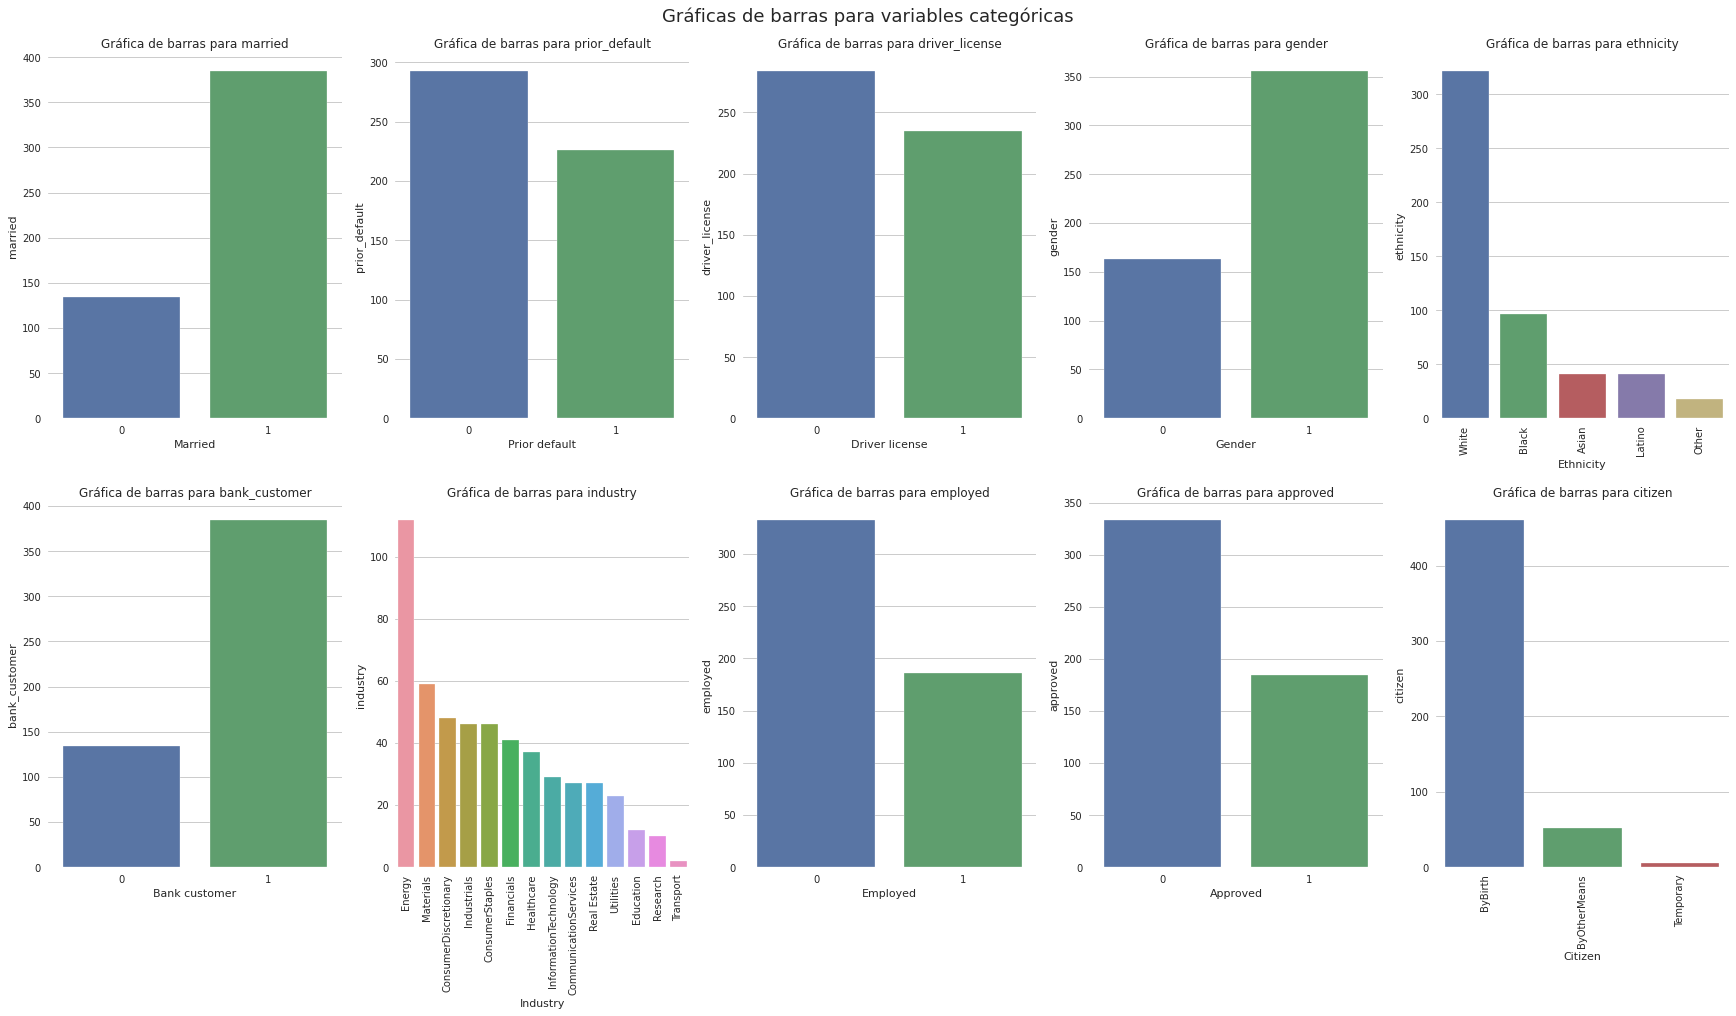

In [147]:
grafica_histogramas(df_categorico_filtrado)

Nuevamente comprobamos que la mayoría de nuestros datos categóricos son binarios, siendo `ethnicity` e `industry` aquellos con mayores variantes posibles.

###D.3 Tablas de contingencia [ESCOGER COLUMNAS]

Las tablas de contingencia realizan conteos respecto a dos variables categóricas, así como gráficas de barras que nos ayuden a visualizarlo. Creamos la función `contin_graf` para visualizarlas.

In [242]:
#Utiliza tablas de contingencia y múltiples gráficas en la misma figure para explorar combinaciones de variables categóricas.
#Crear función para poder generar tablas de contingencia y gráficas a partir de un par de variables categóricas
def contin_graf(df_categorico, var1, var2):
  crosstab = pd.crosstab(df_categorico[var1], df_categorico[var2])
  print(f'Tabla de contingencia para {var1} y {var2}')
  display(crosstab)

  ele_uni = df_categorico[var1].unique()

  c = int(np.ceil(len(ele_uni)/2))
  r = c - 1

  if(c == 1):
    c = 2
    r = 1

  fig, axes = plt.subplots(nrows = r, ncols = c, figsize=(12, 10), sharex=True, sharey=True)

  ren = col = 0

  for cat in ele_uni:
    if(r == 1):
      sns.barplot(x=crosstab.columns, y=crosstab.loc[cat], ax=axes[col])
      axes[col].set(xlabel='', ylabel='', title=f'{var2.capitalize()} con {var1} {cat}')
    else: 
      sns.barplot(x=crosstab.columns, y=crosstab.loc[cat], ax=axes[ren, col])
      axes[ren, col].set(xlabel='', ylabel='', title=f'{var2.capitalize()} con {var1} {cat.lower()}')

    col += 1

    if(col == c):
      col = 0
      ren += 1

  fig.suptitle(f'Gráficas de barras de {var2} separados por {var1}', fontsize=18);

Lo realizamos en X valores categóricos.

Tabla de contingencia para ethnicity y approved


approved,0,1
ethnicity,,
Asian,28,13
Black,43,54
Latino,40,1
Other,11,7
White,212,110


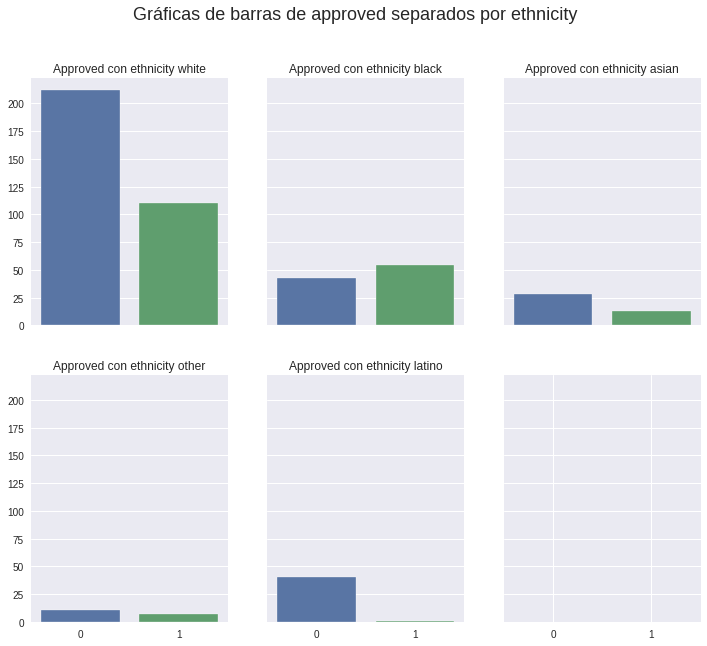

In [243]:
contin_graf(df_categorico_filtrado, 'ethnicity', 'approved')

Tabla de contingencia para gender y approved


approved,0,1
gender,,
0,102,61
1,232,124


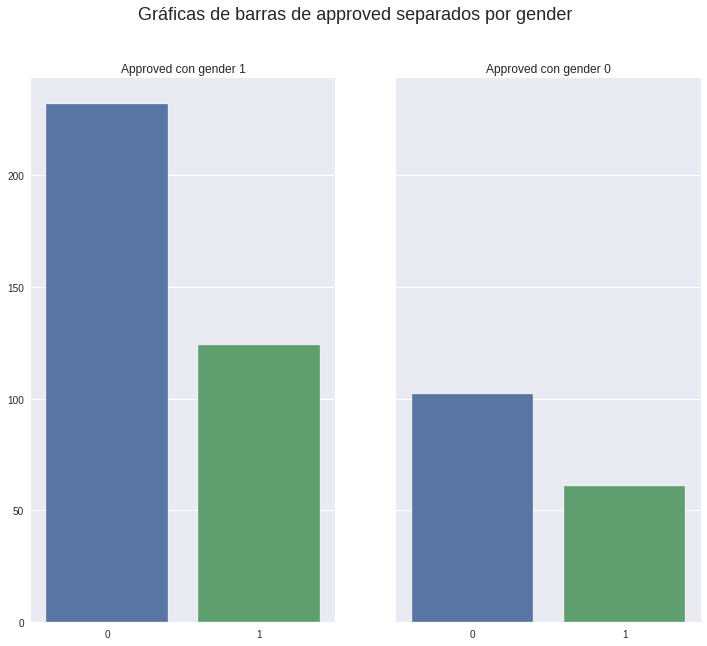

In [244]:
contin_graf(df_categorico_filtrado, 'gender', 'approved')

###D.4 Boxplots y violinplots [ESCOGER COLUMNAS]

Creamos la función `create_box_violin_plots` que automatiza la creación de violinplots y boxplots individuales, así como su unión, a fin de conseguir todas las perspectivas en un solo paso.

In [245]:
#Utiliza boxplots y violinplots para explorar combinaciones de variables numéricas con variables categóricas.
#Generar función para poder crear boxplot, violinplot y su combinación por renglón de variables categóricas 
def create_box_violin_plots(df_completo, var_num, var_cat):

  fig, axis = plt.subplots(nrows = 1, ncols = 3, figsize=(12, 10), sharex=True, sharey=True, constrained_layout=True)  

  sns.boxplot(data=df_completo, x=var_cat, y=var_num, ax=axis[0]);
  axis[0].set_title('Boxplot')

  sns.violinplot(data=df_completo, x=var_cat, y=var_num, ax=axis[1]);
  axis[1].set_title('Violinplot')
  
  sns.boxplot(data=df_completo, x=var_cat, y=var_num, ax=axis[2]);
  sns.violinplot(data=df_completo, x=var_cat, y=var_num, ax=axis[2]);
  axis[2].set_title('Boxplot y violinplot')

  fig.suptitle(f'Box y violin plots de {var_num} separado por {var_cat}', fontsize=18);

Tomamos las columnas de X.

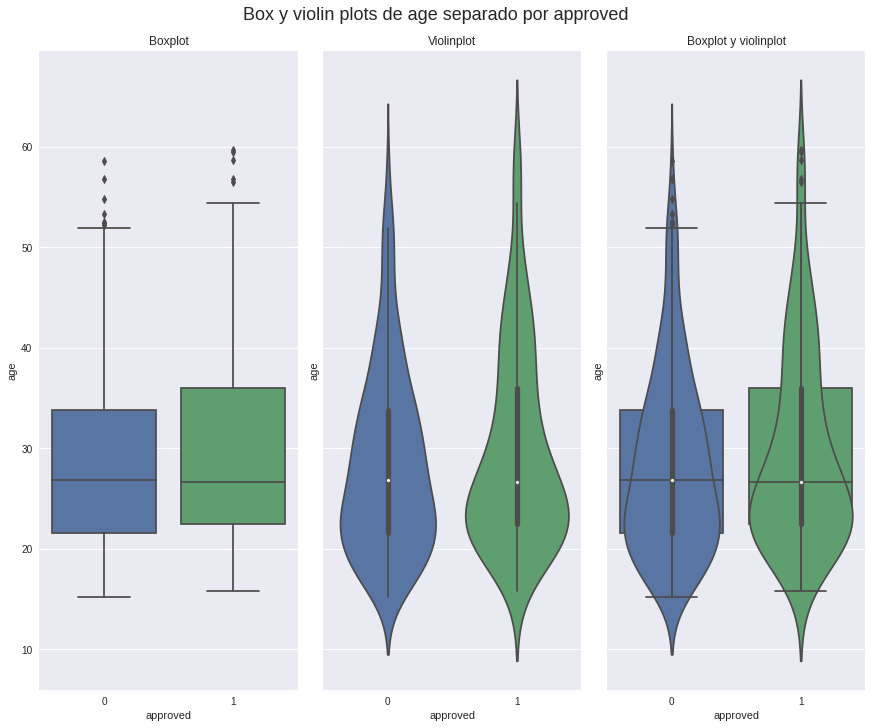

In [246]:
create_box_violin_plots(df_copy, 'age', 'approved')

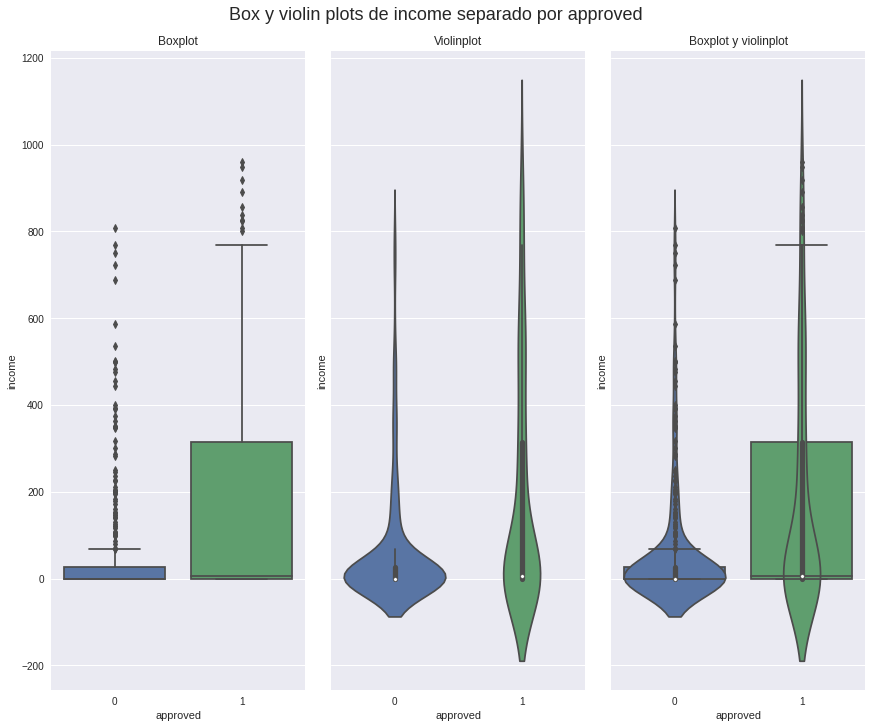

In [247]:
create_box_violin_plots(df_copy, 'income', 'approved')

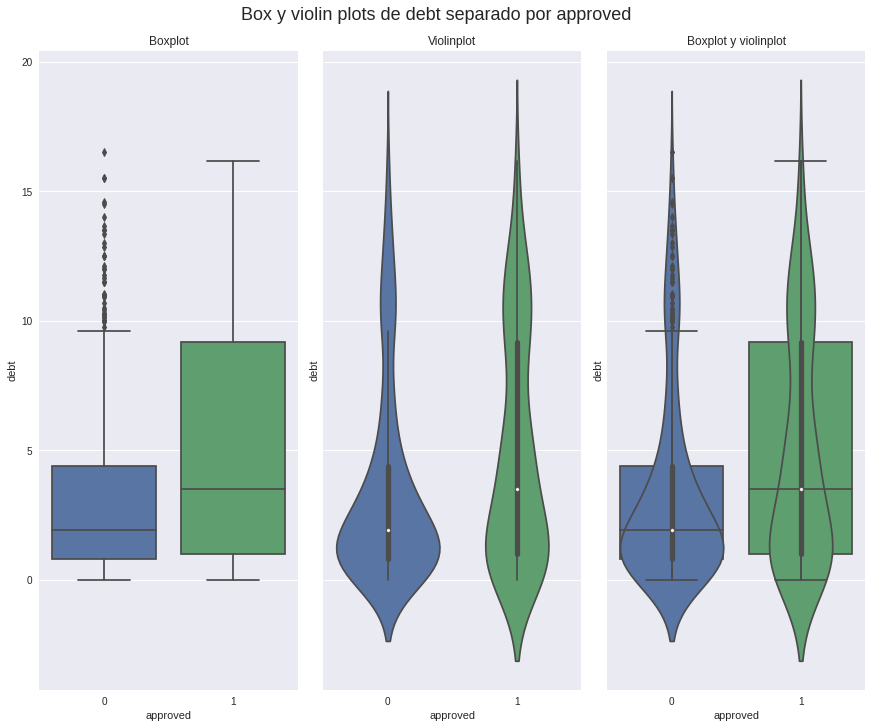

In [248]:
create_box_violin_plots(df_copy, 'debt', 'approved')

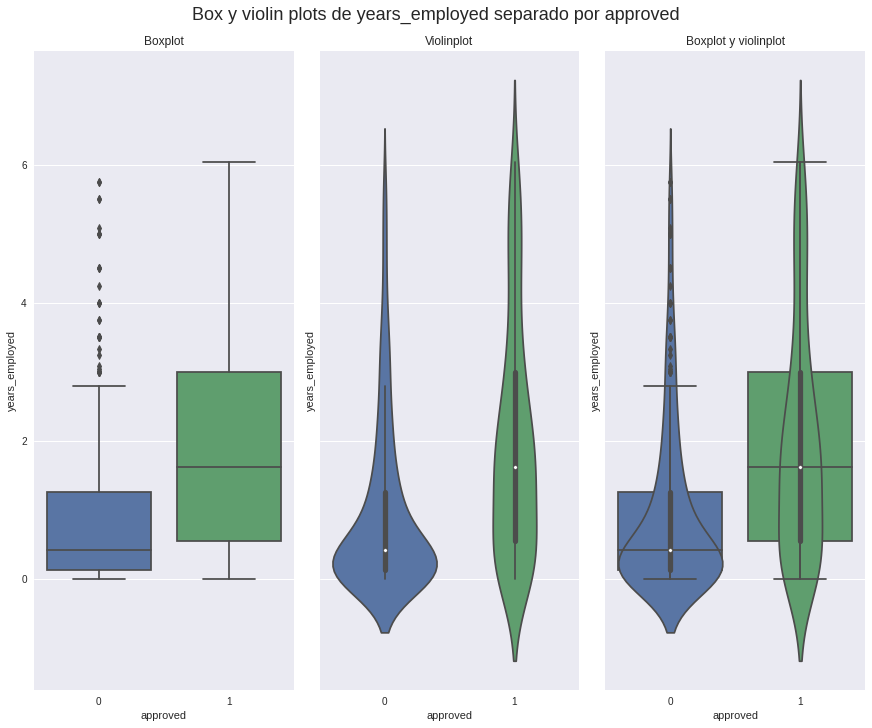

In [249]:
create_box_violin_plots(df_copy, 'years_employed', 'approved')

---
##E. Correlaciones y regresión linear simple - Postwork 4

###E.0 Instrucciones

En este Postwork vamos a hacer análisis bivariado de nuestras variables numéricas. 

- Identifica cuáles son las variables numéricas en tu dataset.
- Asegúrate de que tengan el tipo de dato correcto y que no haya NaNs por ahí escondidos.
- Genera una matriz de correlaciones y un pairplot para visualizar de manera general las relaciones entre tus variables numéricas.
- Utilizando gráficas de dispersión y tus medidas de locación y dispersión, identifica dónde hay valores atípicos y decide qué hacer con ellos.
- Revisa si tu revisión de valores atípicos cambió de alguna manera las relaciones existentes.
- Donde consideres necesario, entrena modelos de Regresión Lineal con un o más pares de variables. Incluso si no te parece que realizar predicciones entre pares de variables tiene sentido para tu proyecto, prueba realizar un par de regresiones para que practiques el procedimiento.

###E.1 Matriz de correlaciones/heatmap/gráficas de dispersión/pairplot

Verificamos los datos cualitativos, tipos de datos y NaNs nuevamente.

In [152]:
#Variables numéricas
df_copy[list(df_numerico.columns)]

,age,debt,years_employed,income
0,30.83,0.000,1.25,0
1,58.67,4.460,3.04,560
2,24.50,0.500,1.50,824
3,27.83,1.540,3.75,3
4,20.17,5.625,1.71,0
...,...,...,...,...
684,40.58,3.290,3.50,0
685,21.08,10.085,1.25,0
686,22.67,0.750,2.00,394
687,25.25,13.500,2.00,1


In [153]:
#Tipo de dato y NaNs
df_copy[list(df_numerico.columns)].dtypes

age               float64
debt              float64
years_employed    float64
income              int64
dtype: object

In [154]:
df_copy[list(df_numerico.columns)].isna().sum()

age               0
debt              0
years_employed    0
income            0
dtype: int64

Creamos una función (`matt_corr`) que automatice la creación de matrices de correlación y heatmap.

In [155]:
#Matriz de correlaciones y pairplot
#Crear función que nos genere todo esto
def mat_corr(df_numerico):
  matriz_corre = df_numerico.corr()
  print('Matriz de correlación de variables numéricas:')
  display(matriz_corre)
  print('\n')

  #Heatmap
  plt.figure(figsize=(8, 6))
  ax = sns.heatmap(matriz_corre, vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

Matriz de correlación de variables numéricas:


,age,debt,years_employed,income
age,1.000000,-0.038441,0.203898,-0.003800
debt,-0.038441,1.000000,0.183958,0.071234
years_employed,0.203898,0.183958,1.000000,0.117674
income,-0.003800,0.071234,0.117674,1.000000


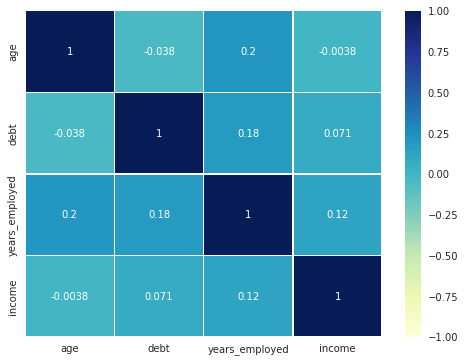

In [156]:
mat_corr(df_copy[list(df_numerico.columns)])

Graficamos el pairplot.

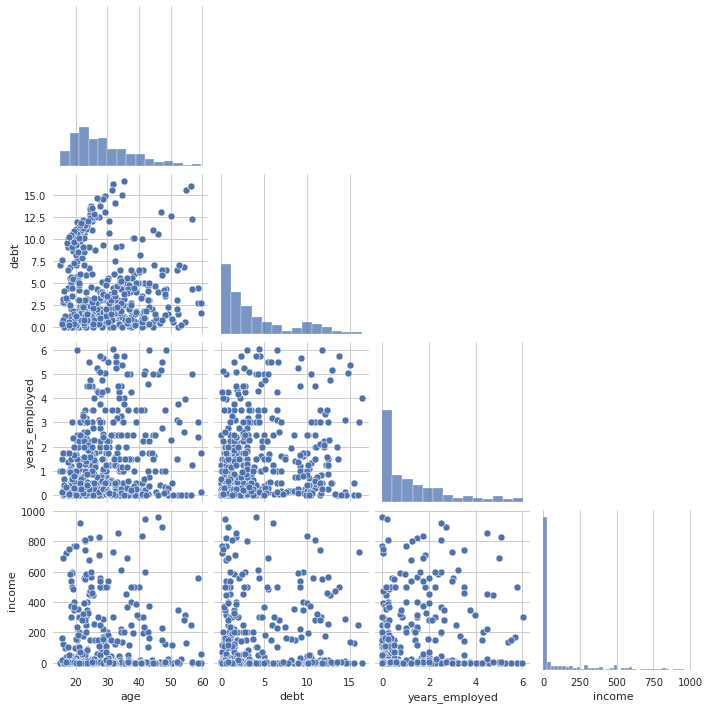

In [157]:
sns.pairplot(df_copy[list(df_numerico.columns)], corner=True);

Los valores atípicos ya fueron tratados en el postwork 2, por lo que no es necesario hacer ningun filtro adicional.

Con todas estas visualizaciones, notamos que todos los datos cualitativos tienen correlaciones bastante bajas. Siendo la más destacada aquella entre `age` y `years_employed`, con una correlación de 0.2.

###E.2 Regresión lineal

Importando la librería `sklearn.linear_model`, definimos la función `reg_lin`. Dado que nuestras correlaciones son bastante pequeñas, como se vió con anterioridad, escogeremos la que más destaca para efectos de ejemplificación del uso de la función.

In [158]:
#Modelo de regresión lineal
#Importr librerías
from sklearn.linear_model import LinearRegression

def reg_lin(serie_x, serie_y):
  #Generar objeto
  lr = LinearRegression()

  # Usamos `to_frame` para convertir nuestra Serie en una estructura de 2 dimensiones, como lo requiere el modelo
  lr.fit(serie_x.to_frame(), serie_y)

  #Predecimos y con x
  y_predict = lr.predict(serie_x.to_frame())

  #Graficamos nuestros puntos y nuestra predección
  sns.scatterplot(x=serie_x, y=serie_y, s=40);
  sns.scatterplot(x=serie_x, y=y_predict, s=25);

  #Obtenemos los coeficientes de la regresión
  intercept = lr.intercept_
  coefficient = lr.coef_[0]

  #Los imprimimos
  print(f'y = {coefficient} * x + {intercept}')

  #Obtenemos el score de nuestro modelo
  print(f'R2: {lr.score(serie_x.to_frame(), serie_y)}')

y = 0.03251838316164859 * x + 0.37461694255830524
R2: 0.0415745188904878


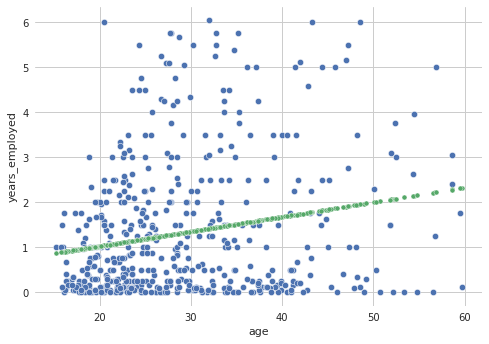

In [159]:
reg_lin(df_copy['age'], df_copy['years_employed'])

Obtenemos un coeficiente de determinación, `R2`, de 0.0415. Es decir que nuestro modelo explica cerca del 4.15% de nuestros datos. Así:

> El modelo es **malo**.



---
##F. Distribuciones muestrales y técnicas de evaluación de modelos - Postwork 5 [INTERPRETACIÓN]


###F.0 Instrucciones

En este Postwork vamos a analizar la incertidumbre y los sesgos que existen en las medidas de locación y dispersión de nuestras variables numéricas, además de practicar el entrenamiento de modelos de Regresión Lineal Múltiple:
*   Identifica las variables numéricas en tu dataset y revisa las medidas de locación y dispersión que ya has realizado de ellas.
* Utilizando la técnica de bootstrap, explora las distribuciones muestrales de las estadísticas que obtuviste anteriormente y reporta:
  * La distribución, su asimetría y curtosis
  * El error estándar
  * El intervalo de confianza que te parezca más apropiado
* Si tiene sentido, elige algunas de tus variables numéricas para entrenar uno o más modelos de Regresión Lineal Múltiple. Utiliza las técnicas de división de dataset y validación cruzada de K-iteraciones para asegurarte de que tu modelo generalice.

### F.1. Distribuciones muestrales.

A continuación se muestran las variables numéricas identificadas en el dataset y sus medidas de dispersión y locación:

In [160]:
#Variables numéricas del dataset
print("\t*** Las variables numericas son: ***")
print(df_numerico.head())
print("\n\t*** Sus estadisticos son: ***")
print(describe_var_num)

	*** Las variables numericas son: ***
     age   debt  years_employed  income
0  30.83  0.000            1.25       0
1  58.67  4.460            3.04     560
2  24.50  0.500            1.50     824
3  27.83  1.540            3.75       3
4  20.17  5.625            1.71       0

	*** Sus estadisticos son: ***
              age        debt  years_employed      income
count  519.000000  519.000000      519.000000  519.000000
mean    28.931541    3.978950        1.315424  105.319846
std      9.415928    4.091696        1.501684  204.876387
min     15.170000    0.000000        0.000000    0.000000
25%     21.920000    0.832500        0.165000    0.000000
50%     26.670000    2.335000        0.750000    1.000000
75%     34.125000    5.772500        2.000000  102.500000
max     59.670000   16.500000        6.040000  960.000000


In [161]:
#Función para aplicar bootstraping
def bootstrapping(df, column, metric):
  bootstrapped_column = df[column]
  metrics = []
  #Aplica bootstrap con las medias de las muestras.
  if metric=='mean':
    for i in range(100_000):
        sample = bootstrapped_column.sample(n=50, replace=True)
        metrics.append(sample.mean())
  #Aplica bootstrap con las medianas de las muestras.
  elif metric=='median':
    for i in range(100_000):
        sample = bootstrapped_column.sample(n=50, replace=True)
        metrics.append(sample.median())
  
  series_metrics = pd.Series(metrics)
  return(series_metrics)

In [162]:
#Función que realiza el bootstrapping de la columna indicada del dataframe.
#Obtiene asimetría, curtosis, error estándar, intervalo de confianza y gráfica su distribución.
def sample_distribution_exploration(df, column, metric, x_axis, y_axis):
  #Bootstrapping de la columna indicada del dataframe
  series_column_metrics=bootstrapping(df,column,metric)

  #Cálculo de curtosis y asímetría.
  skewness=series_column_metrics.skew()
  kurtosis=series_column_metrics.kurtosis()

  #Cálculo del error estándar
  ste=series_column_metrics.std()
  rango=series_column_metrics.max() - series_column_metrics.min()

  #Cálculo de límites inferior y superior.
  limit_inf = series_column_metrics.quantile(0.025)
  limit_sup = series_column_metrics.quantile(0.975)

  #Graficación de la distribución.
  g = sns.histplot(series_column_metrics, kde=False,ax=axs[x_axis, y_axis])
  g.axvline(x=limit_inf, color='r')
  g.axvline(x=limit_sup, color='r')
  g.axes.set_title(f'{metric}s de {column}')
  if metric=='mean':
    mean_conf_interval = f'Intervalo de 95% de confianza de la media: {round(limit_inf,4)} < {round(series_column_metrics.mean(),4)} < {round(limit_sup,4)}'
    g.set_xlabel(f'Asimetría: {skewness}\nCurtosis: {kurtosis}\nError estándar: {ste}\nRango: {rango}\n{mean_conf_interval}', fontsize=10)
  elif metric=='median':
    median_conf_interval = f'Intervalo de 95% de confianza de la mediana: {limit_inf} < {series_column_metrics.median()} < {limit_sup}'
    g.set_xlabel(f'Asimetría: {skewness}\nCurtosis: {kurtosis}\nError estándar: {ste}\nRango: {rango}\n{median_conf_interval}', fontsize=10)

Al aplicar bootstrap, se puede realizar una mejor exploración de las distribuciones de los atributos del dataset.

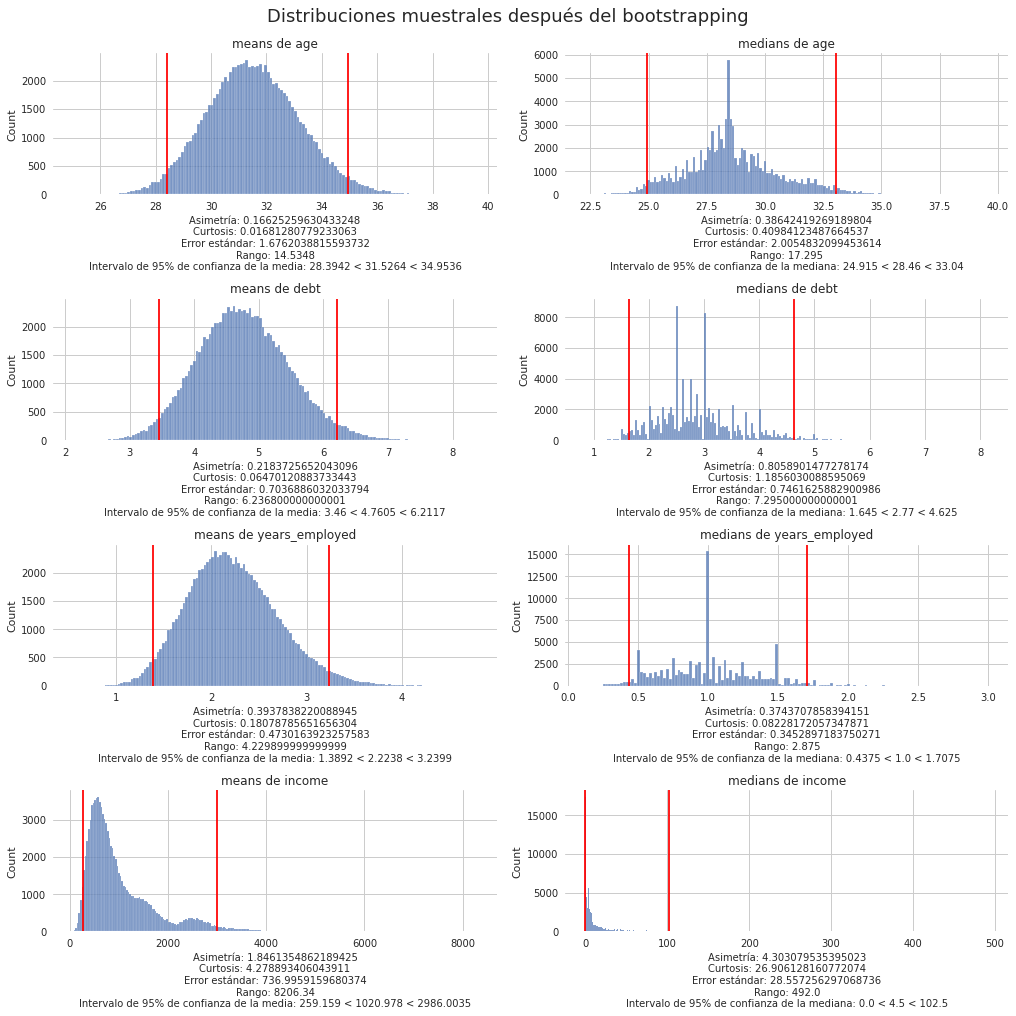

In [163]:
#Exploración de las distribuciones muestrales después de la aplicación de bootstrap.
fig, axs = plt.subplots(4, 2, figsize=(14, 14), constrained_layout=True);

for subrow,column in enumerate(list(df_numerico.columns)):
  sample_distribution_exploration(df,column,'mean',subrow,0)
  sample_distribution_exploration(df,column,'median',subrow,1)

plt.suptitle("Distribuciones muestrales después del bootstrapping", fontsize=18)
plt.show()

Puede notarse que el atributo `income` viene con sesgos desde la toma de la muestra. Esto puede deberse a la cantidad de valores 0 de la misma, que, a su vez, podría ser consecuencia de la cantidad de adultos jóvenes y adolescentes que probablemente no tenían los medios para comprobar un ingreso.

### F.2. Regresión lineal múltiple con datasets de entrenamiento y prueba.

Ahora pasamos a aplicar regresión lineal múltiple con los atributos: `age`, `debt` y `years_employed`, de los cuales `age` y `years_employed` serán las varibles independientes, y debt será la variable a predecir.

In [164]:
from sklearn.model_selection import train_test_split
x = df_numerico[['age','years_employed']]
y = df_numerico['debt']

Dividimos el dataset en dos: 70% para entrenamiento y 30% para prueba:

In [165]:
x_training, x_test, y_training, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

Procedemos a entrenar el modelo y posteriormente a validar su desempeño:

In [166]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#Entrenamiento
lr.fit(x_training, y_training)
#Validación
r2 = lr.score(x_test, y_test)
print(f'El valor r2 es {r2}')

El valor r2 es 0.1419748770389152


Nuestra R2 tiene un valor de aproximadamente 0.11, lo que significa que el modelo puede explicar alrededor del 11% de nuestros datos. Asi:


> El modelo es **malo**.



### F.3. Regresión lineal múltiple con validación cruzada. [INTERPRETACIÓN]

Procedemos a entrenar un nuevo modelo y comprobar su rendiemiento usando validación cruzada:

In [167]:
from pandas._libs.tslibs import ccalendar
from sklearn.model_selection import cross_validate
lr = LinearRegression()
#Entrenamiento y aplicación de la validación cruzada
scores = cross_validate(lr, x, y, scoring='r2', cv=3)
print(scores)
print(f'\nScore del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

{'fit_time': array([0.0075891 , 0.00316644, 0.00319147]), 'score_time': array([0.00363898, 0.00712013, 0.007164  ]), 'test_score': array([0.06053833, 0.03288697, 0.09500142])}

Score del modelo: 0.063 +/- 0.025


---
##G. Visualización de datos avanzada - Postwork 6 [PREGUNTAS 3 4 Y 5]


###G.0 Instrucciones

En este Postwork se usarán nuevos tipos de gráficas que nos ayuden a explorar y entender con más detalle nuestros datos. A continuación se presentan algunas recomendaciones:
* Si hay relaciones jerárquicas que quieras hacer claras o si quieres explorar las proporciones de una variable numérica agrupada en múltiples niveles utiliza un treemap.
* Si quieres explorar la relación entre dos variables numéricas divididas por una variable categórica, utiliza scatterplots por categorías o scatterplots con variables condicionantes.
*Si quieres explorar la relación entre dos variables numéricas pero tu dataset es tan grande que es imposible definir las densidades de tus datos, utiliza un binning hexagonal.
* Si quieres explorar datos geográficos, como definir regiones o puntos en un mapa o visualizar una variable numérica que puede segmentarse por regiones geográficas, utiliza un mapa cloroplético.
* Si quieres explorar una variable numérica agrupada en dos niveles por variables categóricas, utiliza una gráfica de barras apiladas.

Antes que nada, vamos a recordar cuáles son nuestras variables categóricas y cuáles son las numéricas:

###G.1 Scatterplots y gráficas de barras apiladas

In [168]:
%matplotlib inline
print(f'Variables numéricas: {list(df_numerico.columns)}')
print(f'Variables categóricas: {list(df_categorico_filtrado.columns)}')
print("Otras variables categóricas son: 'zip_code', 'credit_score'")

Variables numéricas: ['age', 'debt', 'years_employed', 'income']
Variables categóricas: ['married', 'prior_default', 'driver_license', 'gender', 'ethnicity', 'bank_customer', 'industry', 'employed', 'approved', 'citizen']
Otras variables categóricas son: 'zip_code', 'credit_score'


In [169]:
#Función que permite generar un scatterplot por categorías.
def scatterplot_categories(df, numeric_X, numeric_Y, categoric, axs_X, axs_Y, title):
  sns.scatterplot(df[numeric_X],df[numeric_Y],hue=df[categoric],style=df[categoric],ax=axs[axs_X, axs_Y]);
  axs[axs_X, axs_Y].set_title(title)

In [170]:
#Función que permite generar una gráfica de barras apiladas con 2 categorías.
def stacked_bar2(df, atributo1, atributo2, categoria1, categoria2, title):
  #Se genera tabla de contingencia
  df_grouped=df[[atributo1, atributo2]]
  df_grouped['count'] = 1
  value_counts = df_grouped.groupby([atributo1, atributo2])['count'].sum()
  value_counts = value_counts.unstack(1)
  value_counts = value_counts.fillna(0)

  #Graficación de las barras apiladas
  plt.style.use('seaborn')
  fig = plt.figure(figsize=(8, 8))
  ax = fig.add_subplot()
  plt1 = ax.bar(value_counts.index, value_counts[categoria1], label=categoria1,
              color=["#7788AA","#4E638E","#2E4372","#152A55"])
  plt2 = ax.bar(value_counts.index, value_counts[categoria2], bottom=value_counts[categoria1],
              color=["#FFD0AA", "#D4996A", "#AA6B39", "#804415"])
  ax.set_ylabel('count')
  ax.set_xlabel(f'{value_counts.index}')
  ax.set_title(title, fontsize=18, pad=15);
  plt.legend((plt1[0], plt2[0]), (categoria1, categoria2));


Suponiendo que la variable approved es 1 cuando a la persona le aprueban el crédito y 0 cuando no, entonces a continuación podemos visualizar la aprobación del crédito dependiendo del género de la persona.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


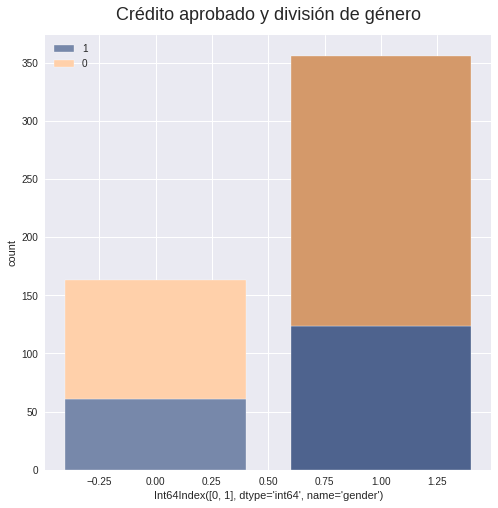

In [171]:
stacked_bar2(df_copy, 'gender','approved', 1, 0, 'Crédito aprobado y división de género')

Puede notarse que hay una brecha grande entre un género y otro al aprobarse un crédito. Ahora veremos si existe alguna relación entre la aprobación del crédito y los rasgos raciales de la persona.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


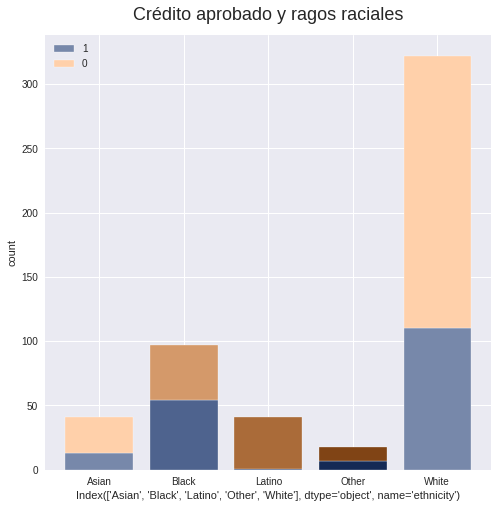

In [172]:
stacked_bar2(df_copy, 'ethnicity','approved', 1, 0, 'Crédito aprobado y ragos raciales')

Y es aquí donde podemos ver cómo a la mayoría de la gente blanca le aprueban el crédito. Cabe destacar que de todas las etnias presentadas, los latinos son los que tienen menos casos de créditos aprobados. Veamos el mismo caso, pero ahora separando los géneros. Empecemos con el género 0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


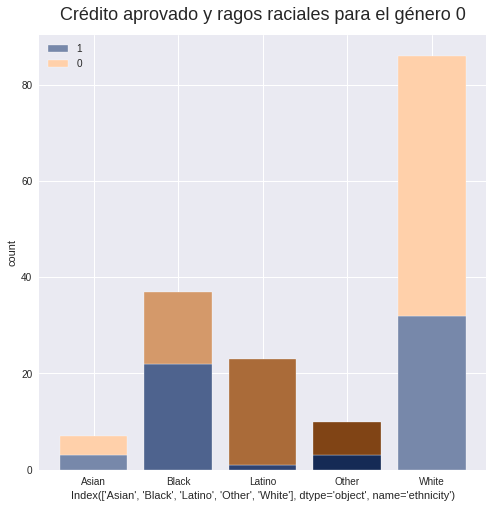

In [173]:
#Divide el dataset por género.
df_gender0= df_copy[df_copy['gender']==0]
df_gender1= df_copy[df_copy['gender']==1]

stacked_bar2(df_gender0, 'ethnicity','approved', 1, 0, 'Crédito aprovado y ragos raciales para el género 0')

Dado que el eje Y no es mayor a 100, se puede deducir que el género 0 es el que menos casos de solicitud tiene registrados, sin embargo, también tiene la mala fortuna de ser al que menos le aprueban el crédito. Ahora veamos la gráfica para el género 1.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


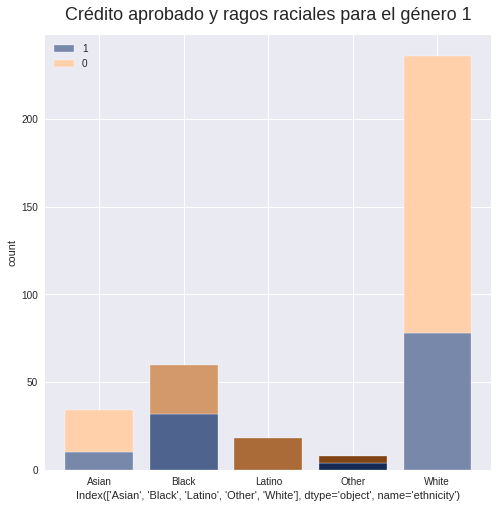

In [174]:
stacked_bar2(df_gender1, 'ethnicity','approved', 1, 0, 'Crédito aprobado y ragos raciales para el género 1')

Y efectivamente, se confirma lo mencionado anteriormente.
Antes de realizar algún otro juicio, veamos cómo la etnia y género se relacionan con la edad y los años trabajando al momento de pedir el crédito.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

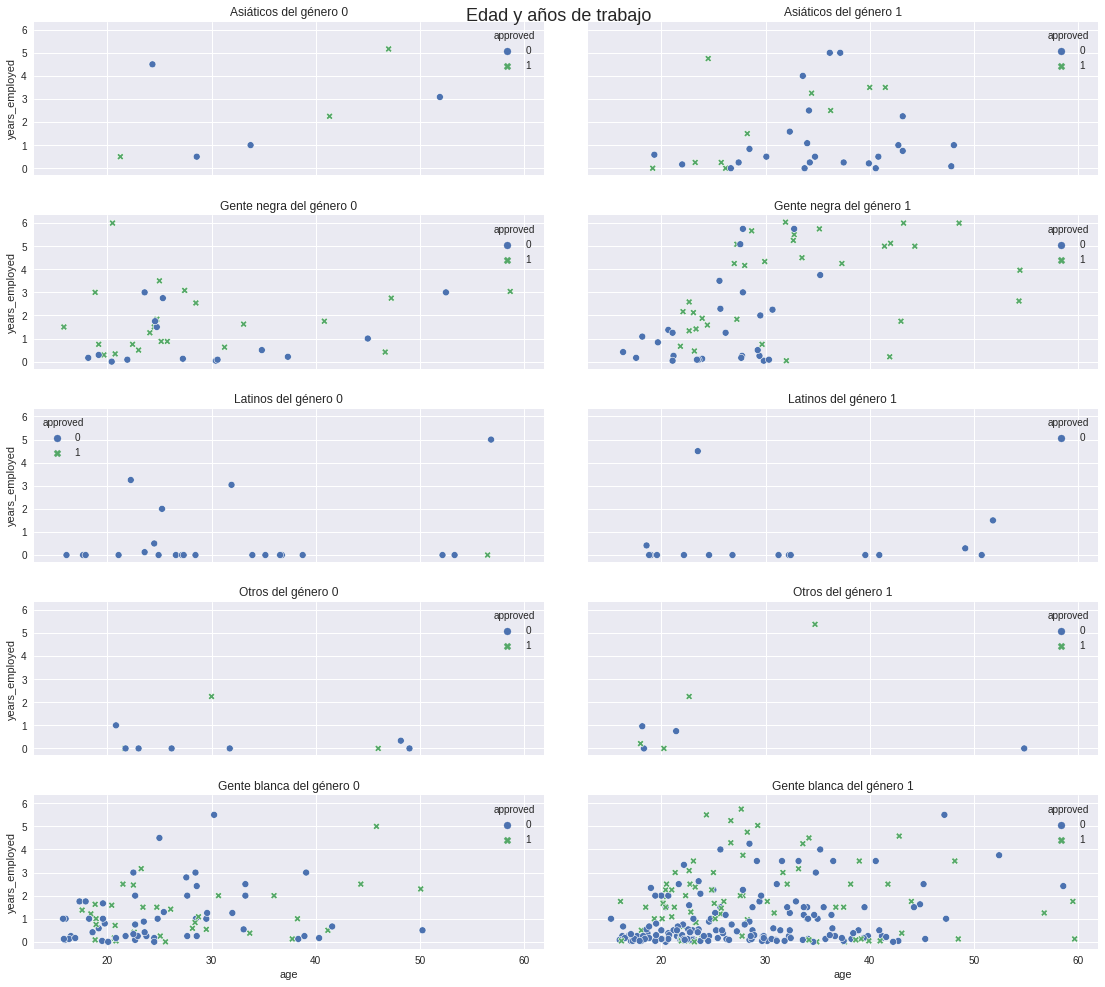

In [175]:
#Divide el dataset por género y etnia.
df_gender0_Asian= df_gender0[df_gender0['ethnicity']=='Asian']
df_gender1_Asian= df_gender1[df_gender1['ethnicity']=='Asian']

df_gender0_Black= df_gender0[df_gender0['ethnicity']=='Black']
df_gender1_Black= df_gender1[df_gender1['ethnicity']=='Black']

df_gender0_Latino= df_gender0[df_gender0['ethnicity']=='Latino']
df_gender1_Latino= df_gender1[df_gender1['ethnicity']=='Latino']

df_gender0_Other= df_gender0[df_gender0['ethnicity']=='Other']
df_gender1_Other= df_gender1[df_gender1['ethnicity']=='Other']

df_gender0_White= df_gender0[df_gender0['ethnicity']=='White']
df_gender1_White= df_gender1[df_gender1['ethnicity']=='White']

#Grafica la aprobación de crédito por género y etnia, además de compararlo con la edad y años trabajando.
fig = plt.figure(figsize=(16, 14))
axs = fig.subplots(5, 2, sharex=True, sharey=True)
fig.suptitle('Edad y años de trabajo', fontsize=18)
fig.tight_layout(pad=3.0)

scatterplot_categories(df_gender0_Asian,'age','years_employed', 'approved', 0,0, "Asiáticos del género 0") 
scatterplot_categories(df_gender1_Asian,'age','years_employed', 'approved', 0,1, "Asiáticos del género 1")

scatterplot_categories(df_gender0_Black,'age','years_employed', 'approved', 1,0, "Gente negra del género 0") 
scatterplot_categories(df_gender1_Black,'age','years_employed', 'approved', 1,1, "Gente negra del género 1")

scatterplot_categories(df_gender0_Latino,'age','years_employed', 'approved', 2,0, "Latinos del género 0") 
scatterplot_categories(df_gender1_Latino,'age','years_employed', 'approved', 2,1, "Latinos del género 1")

scatterplot_categories(df_gender0_Other,'age','years_employed', 'approved', 3,0, "Otros del género 0") 
scatterplot_categories(df_gender1_Other,'age','years_employed', 'approved', 3,1, "Otros del género 1")

scatterplot_categories(df_gender0_White,'age','years_employed', 'approved', 4,0, "Gente blanca del género 0") 
scatterplot_categories(df_gender1_White,'age','years_employed', 'approved', 4,1, "Gente blanca del género 1")

Con lo anterior, puede notarse que la mayoría de los créditos aprobados se les da a personas con edades de entre 20 y 30 años. Respecto a los años de empleo no hay una respuesta clara de que influyan en la obtención del crédito.
En cuanto a las etnias y género, puede notarse que en los latinos, solo un crédito fue aprobado y a una persona del género 0 con entre 50 y 60 años. En cuanto a los asiáticos, hay más créditos aprobados para el género 1 que para el 0, sin embargo, hay muy pocos datos para el 0. Veamos lo que pasa con la deuda.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

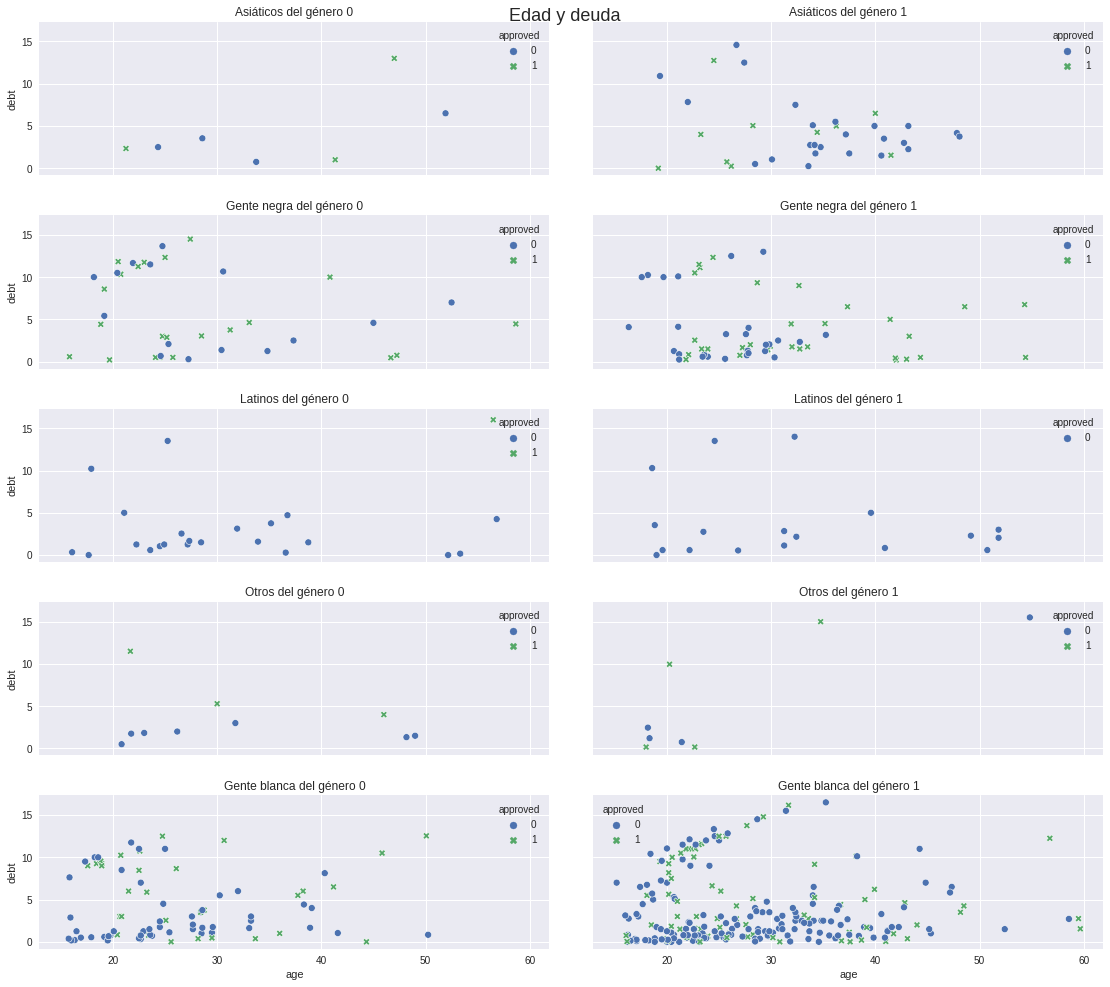

In [176]:
#Grafica la aprobación de crédito por género y etnia, además de compararlo con la edad y deuda.
fig = plt.figure(figsize=(16, 14))
axs = fig.subplots(5, 2, sharex=True, sharey=True)
fig.suptitle('Edad y deuda', fontsize=18)
fig.tight_layout(pad=3.0)

scatterplot_categories(df_gender0_Asian,'age','debt', 'approved', 0,0, "Asiáticos del género 0") 
scatterplot_categories(df_gender1_Asian,'age','debt', 'approved', 0,1, "Asiáticos del género 1")

scatterplot_categories(df_gender0_Black,'age','debt', 'approved', 1,0, "Gente negra del género 0") 
scatterplot_categories(df_gender1_Black,'age','debt', 'approved', 1,1, "Gente negra del género 1")

scatterplot_categories(df_gender0_Latino,'age','debt', 'approved', 2,0, "Latinos del género 0") 
scatterplot_categories(df_gender1_Latino,'age','debt', 'approved', 2,1, "Latinos del género 1")

scatterplot_categories(df_gender0_Other,'age','debt', 'approved', 3,0, "Otros del género 0") 
scatterplot_categories(df_gender1_Other,'age','debt', 'approved', 3,1, "Otros del género 1")

scatterplot_categories(df_gender0_White,'age','debt', 'approved', 4,0, "Gente blanca del género 0") 
scatterplot_categories(df_gender1_White,'age','debt', 'approved', 4,1, "Gente blanca del género 1")

Comentarios sobre deuda***

---
##H. Pruebas A/B y procesamiento del lenguaje natural - Postwork 7

Dado que nuestro dataset no contiene texto más allá de los valores categóricos, se omite el procesamiento del lenguaje natural. Por otro lado, al no contar con una variable que se preste a realizar experimentos A/B, igualmente pasaremos de este tipo de pruebas.

---
##I. Introducción a Machine Learning - Postwork 8

###I.0 Instrucciones

Realiza los siguientes pasos:

- Si hay un problema de clasificación binaria en tu proyecto, aplica lo aprendido en esta sesión y entrena un modelo de Regresión Logística con tu dataset.
- Evalúa tu modelo de Regresión Logística utilizando matriz de confusión; medidas de precisión, exactitud, sensibilidad y especificidad; y curva ROC / AUC.

### I.1. Regresión logística

Revisamos nuevamente nuestros datos.

In [177]:
df_ml = df.copy()

In [178]:
df_ml.head()

,gender,age,debt,married,bank_customer,industry,ethnicity,years_employed,prior_default,employed,credit_score,driver_license,citizen,zip_code,income,approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


Dado que necesitamos utilizar variables numéricas para nuestro modelo de regresión logística, cambiaremos las variables categóricas a números mediante el método `pandas.get_dummies`, que generará una columna por cada valor de cada variable categórica, objeto o cadena.

In [179]:
#Obtenemos el dataframe con todos los datos numéricos
df_ml_dummy= pd.get_dummies(df_ml)

In [180]:
df_ml_dummy.head()

,gender,age,debt,married,bank_customer,years_employed,prior_default,employed,credit_score,driver_license,...,industry_Transport,industry_Utilities,ethnicity_Asian,ethnicity_Black,ethnicity_Latino,ethnicity_Other,ethnicity_White,citizen_ByBirth,citizen_ByOtherMeans,citizen_Temporary
0,1,30.83,0.000,1,1,1.25,1,1,1,0,...,0,0,0,0,0,0,1,1,0,0
1,0,58.67,4.460,1,1,3.04,1,1,6,0,...,0,0,0,1,0,0,0,1,0,0
2,0,24.50,0.500,1,1,1.50,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1,27.83,1.540,1,1,3.75,1,1,5,1,...,0,0,0,0,0,0,1,1,0,0
4,1,20.17,5.625,1,1,1.71,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


Ahora entrenaremos el modelo

In [181]:
#Separamos nuestro data set en X y Y
X = df_ml_dummy.drop(columns=['approved'])
y = df_ml_dummy['approved']

In [182]:
#importamos la biblioteca necesaria
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [183]:
#Separamos nuestro dataset en entrenamiento y prueba, asignando un 30% de los datos al dataset de prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [184]:
#Definimos el máximo de iteraciones
logreg = LogisticRegression(max_iter=10000)

In [185]:
#Ajustamos el modelo
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [186]:
#Realizamos la predicción
y_pred = logreg.predict(X_test)

Obtenemos la exactitud del modelo mediante el método _score_.

In [187]:
logreg.score(X_test, y_test)

0.8840579710144928

Nuestro modelo se acerca muchisimo a un valor de 1. Por ende:



> Nuestro modelo es **bueno**.



### I.2. Matriz de confusión

Evaluaremos el modelo de clasificación binaria mediante una matriz de confusión.

In [188]:
#Importamos la biblioteca necesaria
from sklearn import metrics

In [189]:
#Creamos la matriz
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[102,  17],
       [  7,  81]])

Obtenemos los datos de nuestra matriz de confusión y los visualizamos mediante un heatmap.

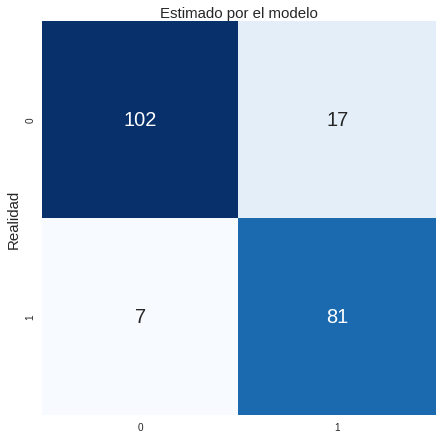

In [190]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

Finalmente utilizamos las 4 medidas de evaluación:
* Precisión
* Exactitud
* Sensibilidad
* Especificidad

In [191]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.826530612244898
Exactitud: 0.8840579710144928
Sensibilidad: 0.9204545454545454
Especificidad: 0.8571428571428571


Los resultados indican que el modelo es **relativamente bueno**, pues los valores son más cercanos a 1 de lo que son a 0.5

### I.3 Curva ROC / AUC

Ahora evaluamos nuestro modelo de clasificación binaria utilizando una curva ROC / AUC.

Para graficar una curva ROC / AUC necesitamos resultados probabilísticos, como estos:


In [192]:
y_pred_proba = logreg.predict_proba(X_test)

y_pred_proba[:10,:]

array([[0.06944006, 0.93055994],
       [0.89393894, 0.10606106],
       [0.94943141, 0.05056859],
       [0.9678693 , 0.0321307 ],
       [0.85405962, 0.14594038],
       [0.37164407, 0.62835593],
       [0.9842062 , 0.0157938 ],
       [0.97564213, 0.02435787],
       [0.72794184, 0.27205816],
       [0.41476932, 0.58523068]])

In [193]:
#Importamos las biblioteca necesaria
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

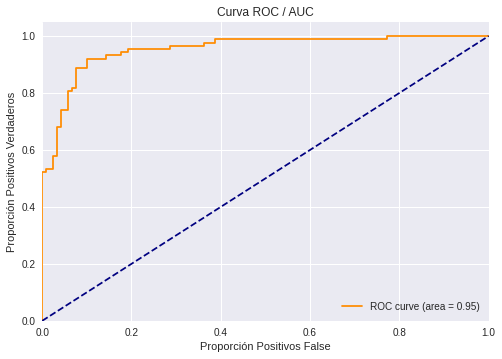

In [194]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

Nuestro valor AUC es muy cercano al 1 (0.93). Esto significa que nuestro modelo puede diferenciar casi a la perfección entre negativos y positivos, y que además es muy probable que elija la clasificación correcta. Por tanto:



> El modelo es **bueno**.

